# PISA Data
## by Liangbin Chen

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. 

> The purpose of this project is to find out the features that contribute most to the students' academic success.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pisa = pd.read_csv('raw-data/pisa2012.csv', encoding='latin1');

C:\Users\Brandon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We are mainly interested in the final results MATH, READ and SCIE. Since there are five tests on each subject, I am going to create a column for average score on each subject.

In [16]:
pisa['MATH'] = pisa.loc[:, 'PV1MATH':'PV5MATH'].mean(axis=1)

In [12]:
pisa['READ'] = pisa.loc[:, 'PV1READ':'PV5READ'].mean(axis=1)

In [13]:
pisa['SCIE'] = pisa.loc[:, 'PV1SCIE':'PV5SCIE'].mean(axis=1)

In [11]:
pisa.shape

(485490, 638)

It is a huge dataset so I am only going to pick those columns that are closely related to this project. The columns selected are as follow:

CNT : Country code 3-character  
OECD   : OECD country  
ST01Q01: GRADE  
ST04Q01: GENDER    
ST72Q01: Class Size  
LMINS: Language learning minutes per week  
MMINS: Math learning minutes per week  
SMINS: Science learning minutes per week  
OUTHOURS: Out-of-School Study Time    
WEALTH: Wealth  
HISCED: Highest ISCED of parents  
READ: Read score
MATH: Math score
SCIE: Scie score

In [17]:
columns_selected = ['CNT','OECD','ST01Q01','ST04Q01','ST72Q01','LMINS','MMINS','SMINS','OUTHOURS','WEALTH','HISCED','READ','MATH','SCIE']

In [19]:
df = pisa[columns_selected]

Rename columns properly

In [20]:
df = df.rename(columns={'CNT':'country',
                   'OECD':'OECD',
                   'ST01Q01':'grade',
                   'ST04Q01':'gender',
                   'ST72Q01':'class_sz',
                   'LMINS':'lang_mins',
                   'MMINS':'math_mins',
                   'SMINS':'scie_mins',
                   'OUTHOURS':'out_hrs',
                   'WEALTH':'wealth',
                   'HISCED':'high_ISCED',
                   'READ':'read',
                   'MATH':'math',
                   'SCIE':'scie'})

In [21]:
df.head()

,country,OECD,grade,gender,class_sz,lang_mins,math_mins,scie_mins,out_hrs,wealth,high_ISCED,read,math,scie
0,Albania,Non-OECD,10,Female,NaN,NaN,NaN,NaN,NaN,-2.92,"ISCED 3A, ISCED 4",261.01424,366.18634,371.91348
1,Albania,Non-OECD,10,Female,30.0,315.0,270.0,90.0,8.0,0.69,"ISCED 5A, 6",384.68832,470.56396,478.12382
2,Albania,Non-OECD,9,Female,30.0,300.0,NaN,NaN,24.0,-0.23,"ISCED 5A, 6",405.18154,505.53824,486.60946
3,Albania,Non-OECD,9,Female,28.0,135.0,135.0,90.0,17.0,-1.17,"ISCED 5A, 6",477.46376,449.45476,453.97240
4,Albania,Non-OECD,9,Female,NaN,NaN,NaN,NaN,NaN,-1.17,"ISCED 3A, ISCED 4",256.01010,385.50398,367.15778


In [22]:
ISCED_classes = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    ISCEDclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ISCED_classes)
    df['high_ISCED'] = df['high_ISCED'].astype(ISCEDclasses)
else: # compatibility for v.20
    df['high_ISCED'] = df['high_ISCED'].astype('category', ordered = True,
                                                     categories = ISCED_classes)

In [23]:
df.shape

(485490, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 14 columns):
country       485490 non-null object
OECD          485490 non-null object
grade         485490 non-null int64
gender        485490 non-null object
class_sz      294163 non-null float64
lang_mins     282866 non-null float64
math_mins     283303 non-null float64
scie_mins     270914 non-null float64
out_hrs       308799 non-null float64
wealth        479597 non-null float64
high_ISCED    473091 non-null category
read          485490 non-null float64
math          485490 non-null float64
scie          485490 non-null float64
dtypes: category(1), float64(9), int64(1), object(3)
memory usage: 48.6+ MB


### What is the structure of your dataset?

> There are 474406 students in this dataset with 14 features each. Out of those fratures, `high_ISCED` is ordinal categorical variables, `country, gender , OECD` are binomial categorical variables, all others are numerical variables.
> It is also obvious that over 20,000 rows has some null values.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in figuring out what features are best predicting the result of students' performance in math, read and science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the features chosen.

Now look for outliers

In [25]:
df.describe()

,grade,class_sz,lang_mins,math_mins,scie_mins,out_hrs,wealth,read,math,scie
count,485490.000000,294163.000000,282866.000000,283303.000000,270914.000000,308799.000000,479597.00000,485490.000000,485490.000000,485490.000000
mean,9.813323,26.017759,219.276636,226.007056,211.122460,11.104100,-0.33701,472.006964,469.651234,475.808094
std,3.734726,9.223134,97.997730,97.448421,131.368322,10.476669,1.21530,98.863310,100.786610,97.998470
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.65000,6.445400,54.767080,25.158540
25%,9.000000,20.000000,165.000000,180.000000,120.000000,4.000000,-1.04000,405.044200,396.019620,405.762800
50%,10.000000,25.000000,200.000000,220.000000,180.000000,8.000000,-0.30000,475.477980,465.734520,475.512860
75%,10.000000,30.000000,250.000000,250.000000,270.000000,14.000000,0.43000,542.831195,540.123060,546.381920
max,96.000000,200.000000,2400.000000,3000.000000,2975.000000,180.000000,3.25000,849.359740,903.107960,857.832900


Looks like we have some outliers in `grade, lang_mins, math_mins, scie_mins, out_hrs`

Define a function to plot histagram of a column

In [26]:
def hist_plot(df, col, bin_size):
    bins = np.arange(df[col].min(), df[col].max()+bin_size, bin_size)
    plt.hist(data=df, x=col, bins=bins)
    plt.xlabel(col);

Define a function to drop outliers higher than `limit`.

In [27]:
def df_ol_drop (df, col, limit):
    df_sub = df[df[col] > limit]
    df = df.drop(df_sub.index)
    return df

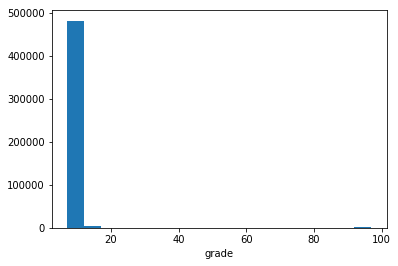

In [28]:
hist_plot(df, 'grade', 5);

Obviously there are some outliers around 95, I am going to drop them.

In [29]:
df = df_ol_drop(df, 'grade', 20);

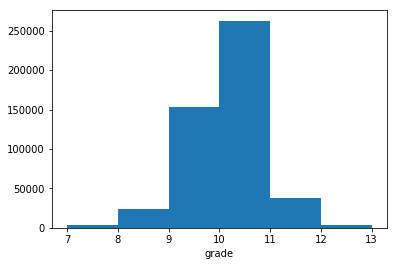

In [30]:
hist_plot(df, 'grade', 1)

In [31]:
df.query('grade == 13')

,country,OECD,grade,gender,class_sz,lang_mins,math_mins,scie_mins,out_hrs,wealth,high_ISCED,read,math,scie
194508,United Kingdom,OECD,13,Female,NaN,NaN,NaN,NaN,NaN,0.51,ISCED 5B,484.37426,472.19972,500.96980
371078,New Zealand,OECD,13,Female,22.0,240.0,240.0,240.0,7.0,-0.51,"ISCED 5A, 6",622.26650,662.26048,616.22528
371120,New Zealand,OECD,13,Male,24.0,270.0,270.0,810.0,6.0,0.51,"ISCED 5A, 6",668.96430,730.49540,706.76986


There is only 3 students in grade 13, it is safe to drop those 3 as well.

In [32]:
df = df_ol_drop(df, 'grade', 12)

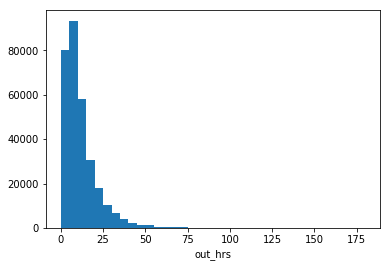

In [33]:
hist_plot(df, 'out_hrs', 5);

From the plot we can see majority of spend less than 55 hrs study out of school, I am going to drop all the rows with `out_hrs` higher than 55.

In [34]:
df = df_ol_drop(df, 'out_hrs', 55)

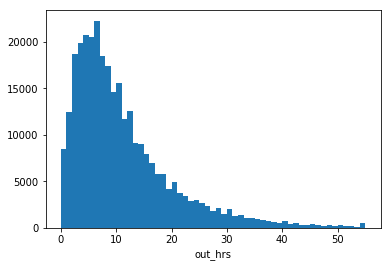

In [35]:
hist_plot(df, 'out_hrs', 1);

From the plot we can see `out_hrs` skewed to right

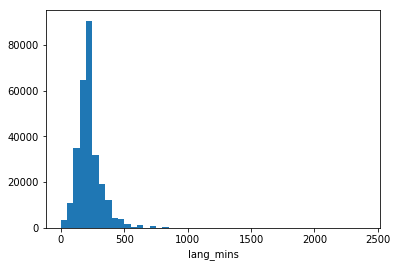

In [36]:
hist_plot(df, 'lang_mins', 50);

Looks like the majority of students spend less than 550 minutes per week on language, I am going to drop rows with `lang_mins` larger than 550.

In [37]:
df = df_ol_drop(df, 'lang_mins', 550);

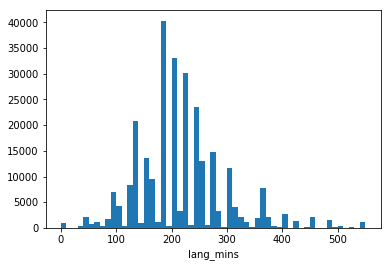

In [38]:
hist_plot(df, 'lang_mins', 10);

   Looks like the distribution of `lang_mins` is symmetric. It is also discrete rather than continuous.

Now let's take a look at `math_mins`

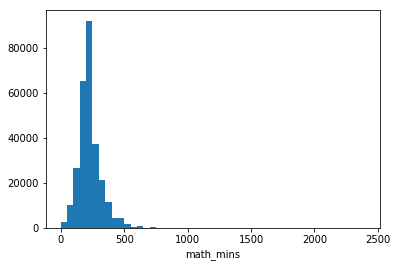

In [39]:
hist_plot(df, 'math_mins', 50);

Looks like the majority of students spend less than 550 minutes per week on math, I am going to drop rows with `math_mins` larger than 550.

In [40]:
df = df_ol_drop(df, 'math_mins', 550)

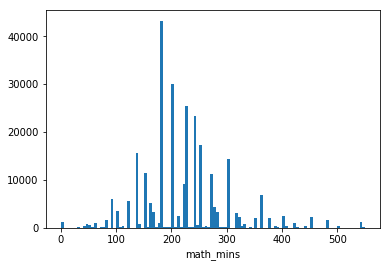

In [41]:
hist_plot(df, 'math_mins', 5);

   Looks like the distribution of `math_mins` is close to symmetric. It is also discrete rather than continuous.

Now take a look at `scie_mins`

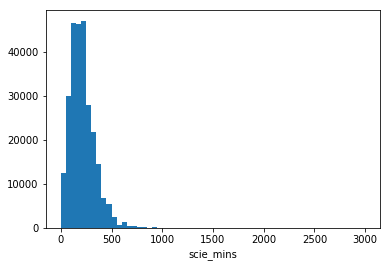

In [42]:
hist_plot(df, 'scie_mins', 50);

Looks like the majority of students spend less than 550 minutes per week on science, I am going to drop rows with `science_mins` larger than 550.

In [43]:
df = df_ol_drop(df, 'scie_mins', 550)

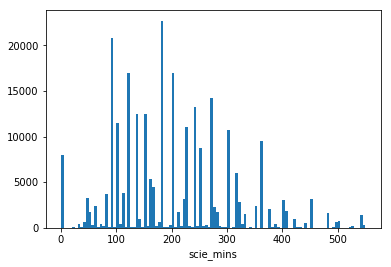

In [44]:
hist_plot(df, 'scie_mins', 5);

Looks like the distribution of `scie_mins` skewed to right

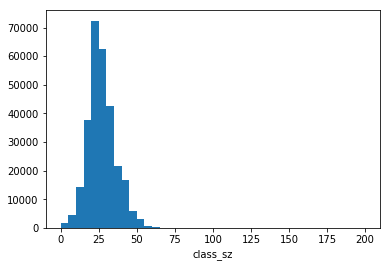

In [45]:
hist_plot(df, 'class_sz', 5);

Majority of class sizes are under 65, it is safe to drop rows with `class_sz` higher than 65

In [46]:
df = df_ol_drop(df, 'class_sz', 65)

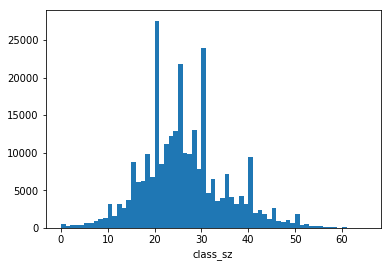

In [47]:
hist_plot(df, 'class_sz', 1)

It is a symmetric distribution with some spikes around whole numbers (like 20, 25, 30, 40). It could be results of rounding of numbers.

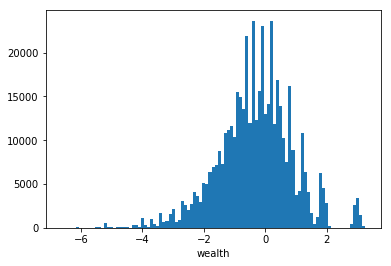

In [48]:
hist_plot(df, 'wealth', 0.1);

The distribution of`wealth` is unimodal and skewed to left

Now let's take a look at the distribution of `read, math, scie`

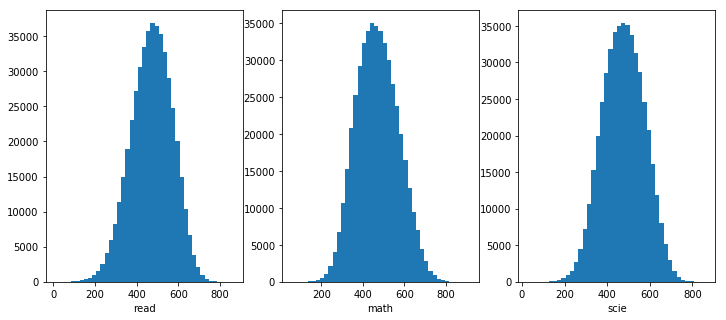

In [49]:
plt.figure(figsize=[12,5])
for i in range(1,4):
    cols = ['read', 'math', 'scie']
    plt.subplot(1,3,i)
    hist_plot(df, cols[i-1], 20);

We can see all of them follows nice normal distribution with the exception of `scie`, which is slightly skewed to left. Furthermore, all three distributions pretty much overlap with each other.

In [50]:
#df.to_csv('after_uni_explore.csv', index=False)

In [51]:
#df = pd.read_csv('after_uni_explore.csv')

## Univariate Exploration


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No tranformations were applied to any variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Because it is a huge dataset, we can afford to drop some outliers on almost all of the numerical variables.

## Bivariate Exploration

> For the purpose of this project, I am only going to explore the relation between `math` score and other related variables.

`grade` feature can be treated both as numerical and categorical variable, so I included it in those lists.

In [52]:
numeric_vars = ['math', 'math_mins', 'out_hrs', 'wealth']
categorical_vars = ['OECD', 'gender', 'high_ISCED', 'grade']

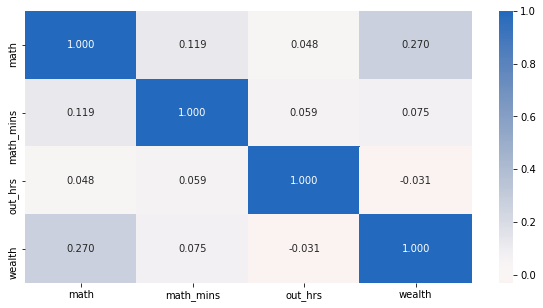

In [53]:
# correlation plot
plt.figure(figsize=[10,5])
sb.heatmap(data=df[numeric_vars].corr(), annot=True, fmt='.3f', 
          cmap='vlag_r', center=0);

From the correlation plot we can see `math` is positively related to `math_mins and wealth`. 

Now let's take a look at a pair grid plot.

In [54]:
df_sample = df.sample(5000)

C:\Users\Brandon\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Brandon\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


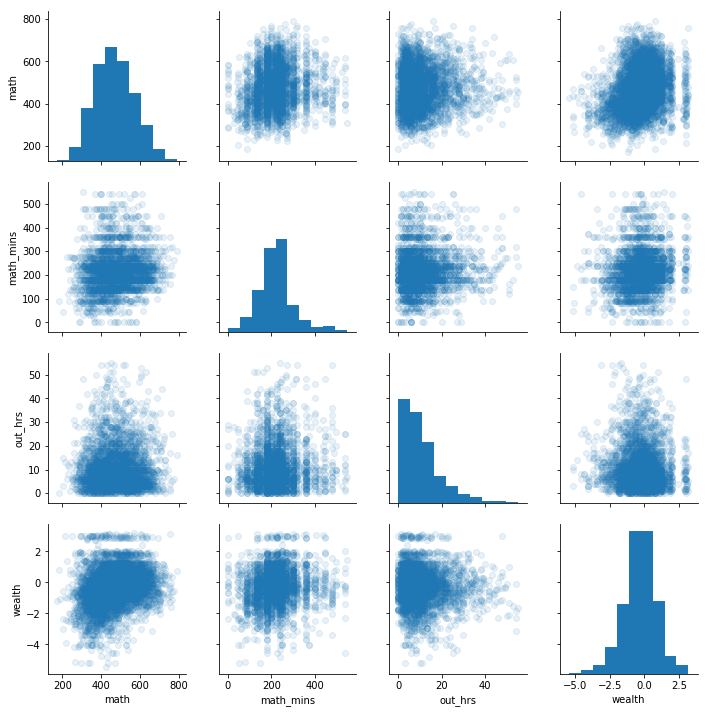

In [55]:
#Pair Grid
g = sb.PairGrid(data = df_sample, vars = numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1);

The pair grid confirmed the positive relationship between `math` with `math_mins` and `math` with `wealth`.
Now let's take a look at how `math, wealth` correlate with categorical variables.

In [56]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

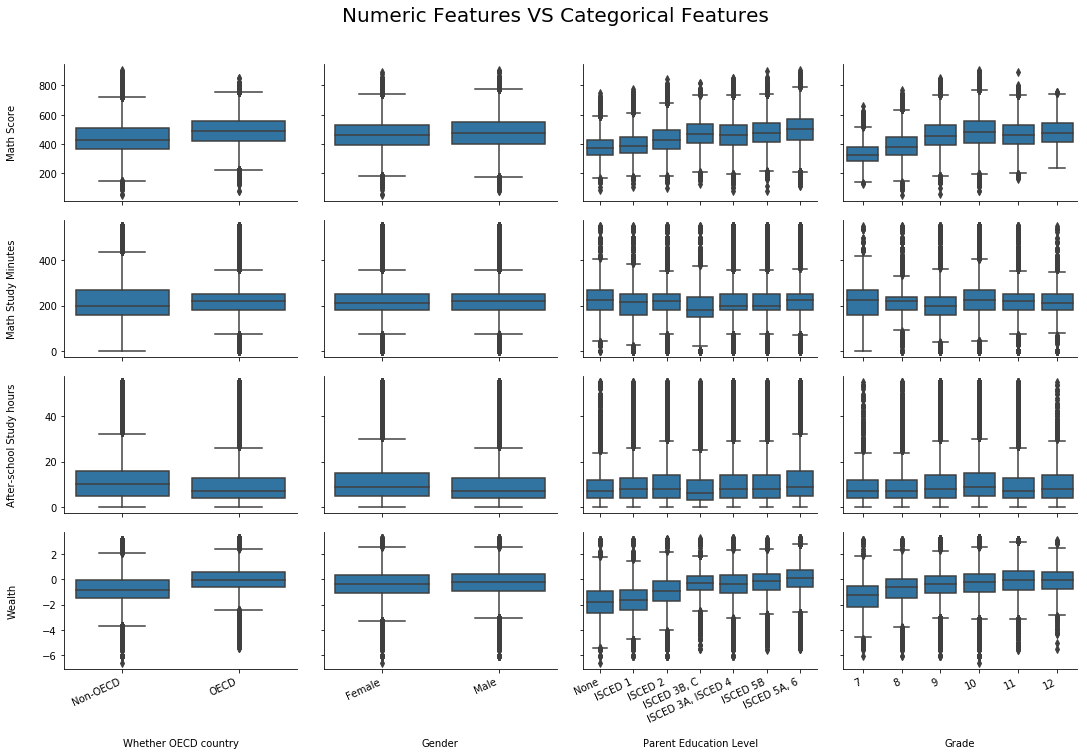

In [57]:
g = sb.PairGrid(data = df, y_vars = numeric_vars, x_vars = categorical_vars,
                height = 2.5, aspect=1.5)
g.map(boxgrid)
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Numeric Features VS Categorical Features', size=20)
replacements = {'math': 'Math Score', 'wealth': 'Wealth',
                'math_mins': 'Math Study Minutes', 'out_hrs': 'After-school Study hours',
                'OECD': 'Whether OECD country', 'gender': 'Gender',
                'high_ISCED': 'Parent Education Level', 'grade':'Grade'}
for i in range(4):
    for j in range(4):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
        #Align x and y axis labels
        g.axes[i][j].get_xaxis().set_label_coords(0.5,-0.5)
        g.axes[i][j].get_yaxis().set_label_coords(-0.2,0.5);


From the plot we can see overall students in OECD countries have better math scores than those in non-OECD countries, male students performs better than female students, and students whose parents received better education score higher in math.   
On the other hand, OECD students' family have higher wealth over non-OECD students'.   
Students whose parents have higher education possess more wealth as well.  
Students with higher grade also possess more wealth.
Female students spend more hours study after school than male students.

Now let's take a look at the relationship between categorical variables `OECD, high_ISCED, gender`.

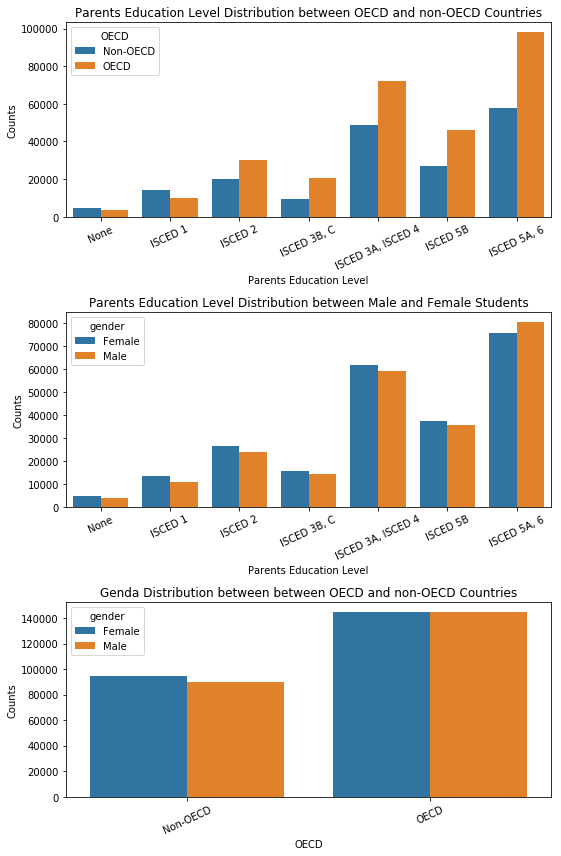

In [58]:
plt.figure(figsize=[8,12])
plt.subplot(3,1,1)
sb.countplot(data=df, x='high_ISCED', hue='OECD')
plt.xticks(rotation=25)
plt.title('Parents Education Level Distribution between OECD and non-OECD Countries')
plt.xlabel('Parents Education Level')
plt.ylabel('Counts')
plt.subplot(3,1,2)
sb.countplot(data=df, x='high_ISCED', hue='gender')
plt.xticks(rotation=25)
plt.title('Parents Education Level Distribution between Male and Female Students')
plt.xlabel('Parents Education Level')
plt.ylabel('Counts')
plt.subplot(3,1,3)
sb.countplot(data=df, x='OECD', hue='gender')
plt.xticks(rotation=25)
plt.title('Genda Distribution between between OECD and non-OECD Countries')
plt.ylabel('Counts')
plt.tight_layout();

From those plots we can see students' parents in OECD countries have much higher education than non-OECD countries. There is no obvious difference in term of parents' education level between male and female students. The head counts of male students are slightly lower than female students in both OECD and non-OECD countries, but they are not significant.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Math score has a positive relation with grade, which is easy to understand. Higher grade means the student spend more years in school, which results better math skills.  
> The higher the parents' education level is, the better the student is at math.  
> The math score is also related with the family wealth. The more wealth the family possess, the better the student is at math.  
> Male students are better at math than female students.  
> Students in OECD countries have better average math scores than those in non-OECD countries.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> OECD students' family have higher wealth over non-OECD students', their parents also have higher educaton level. Those two reasons contribute to the fact that OECD students have better math scores.  
> Students whose parents have higher education possess more wealth as well.  
> Students with higher grade also possess more wealth. It could be explained that the more wealth parents are more willing to send their children to school at younger age.

## Multivariate Exploration


Because male students are better at math than female students, and this factor is not affected by any other factors, I am going to devide the sample to male and female students. This way, the distribution of male/female gender will not affect the final result.

In [59]:
#Create a subset of male and female students
df_m = df.query('gender == "Male"')
df_f = df.query('gender == "Female"')

For this project, we are only to explore the relationship between male students math scores and other variables. The process for female students is the same, so is the result.

First of all I am going to explore the relationship between math score with grade and parents' education level. I am going to creat a heatmap and map the average math score to the opacity of color.

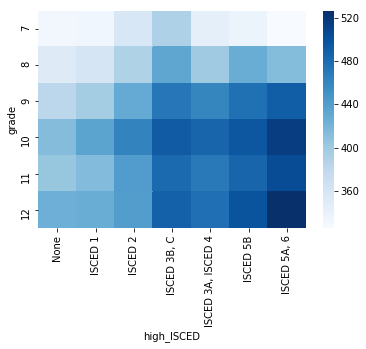

In [60]:
df_mean1 = df_m.groupby(['grade', 'high_ISCED'])['math'].mean().reset_index()
df_pivot1 = df_mean1.pivot('grade', 'high_ISCED', 'math')
sb.heatmap(df_pivot1, cmap = 'Blues');

Overall, the higher grade students have higher math scores with some exceptions. Students in grade 10 match the performance of grade 12. The reason behind this is grade 10 is the typical grade for age 16 students in all the developed countries and countries like China-Shanghai or Chinese-Taipei. As a result, parents shouldn't be attempted to send their children to grade 1 at 4 years old instead of typical 6 years old. 
On the other hand, among students in the same grade, students whose parents have higher education level peformed better in math scores.

Now I am going to explore the relationship between `math` and other variables provided the same `grade` and `high_ISCED`.

In [61]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(x.min(), x.max(), (x.max()-x.min())/50)
    bins_y = np.arange(100,900,20)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

First take a look at `math` and `wealth`.

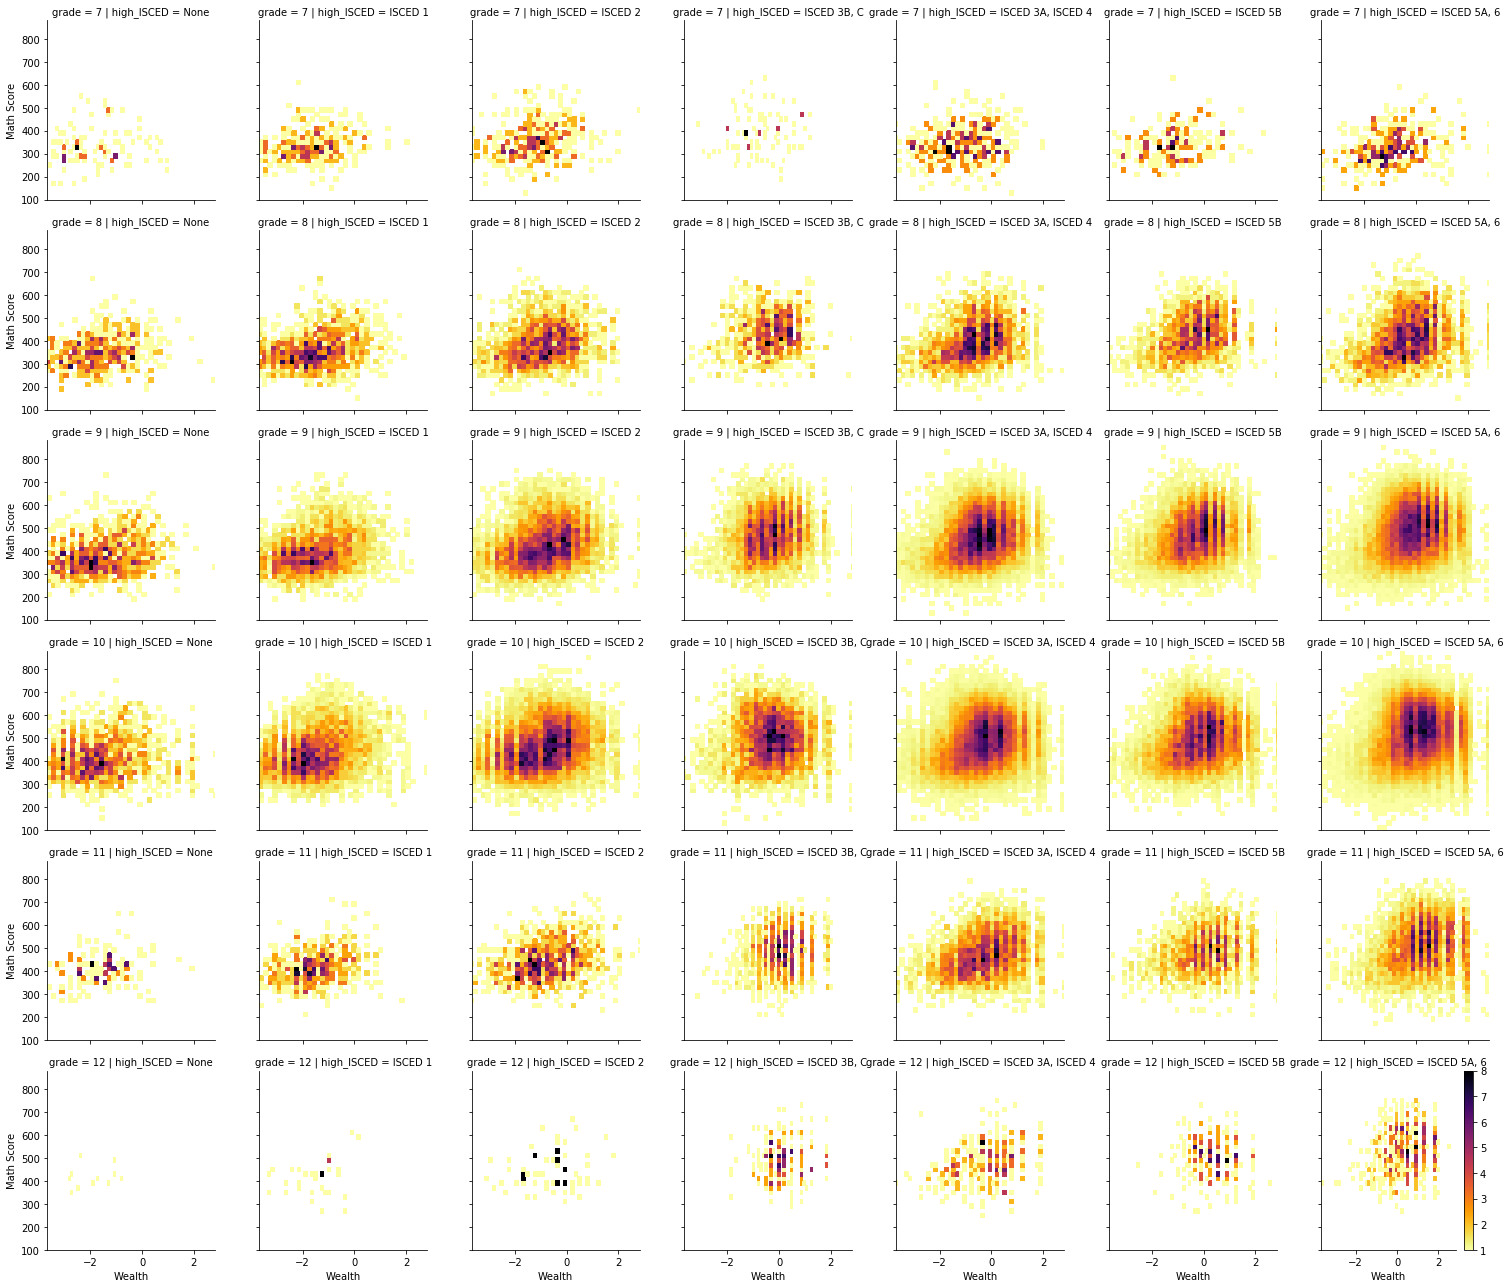

In [62]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade')
g.map(hist2dgrid, 'wealth', 'math', color = 'inferno_r')
g.set_xlabels('Wealth')
g.set_ylabels('Math Score')
plt.colorbar();

It is very obvious with the same grade, same parents education level, the math scores of male students are clearly positively related with the family wealth, especially among grade 8-10 students.

Secondly take a look at `math` and `our_hrs`.

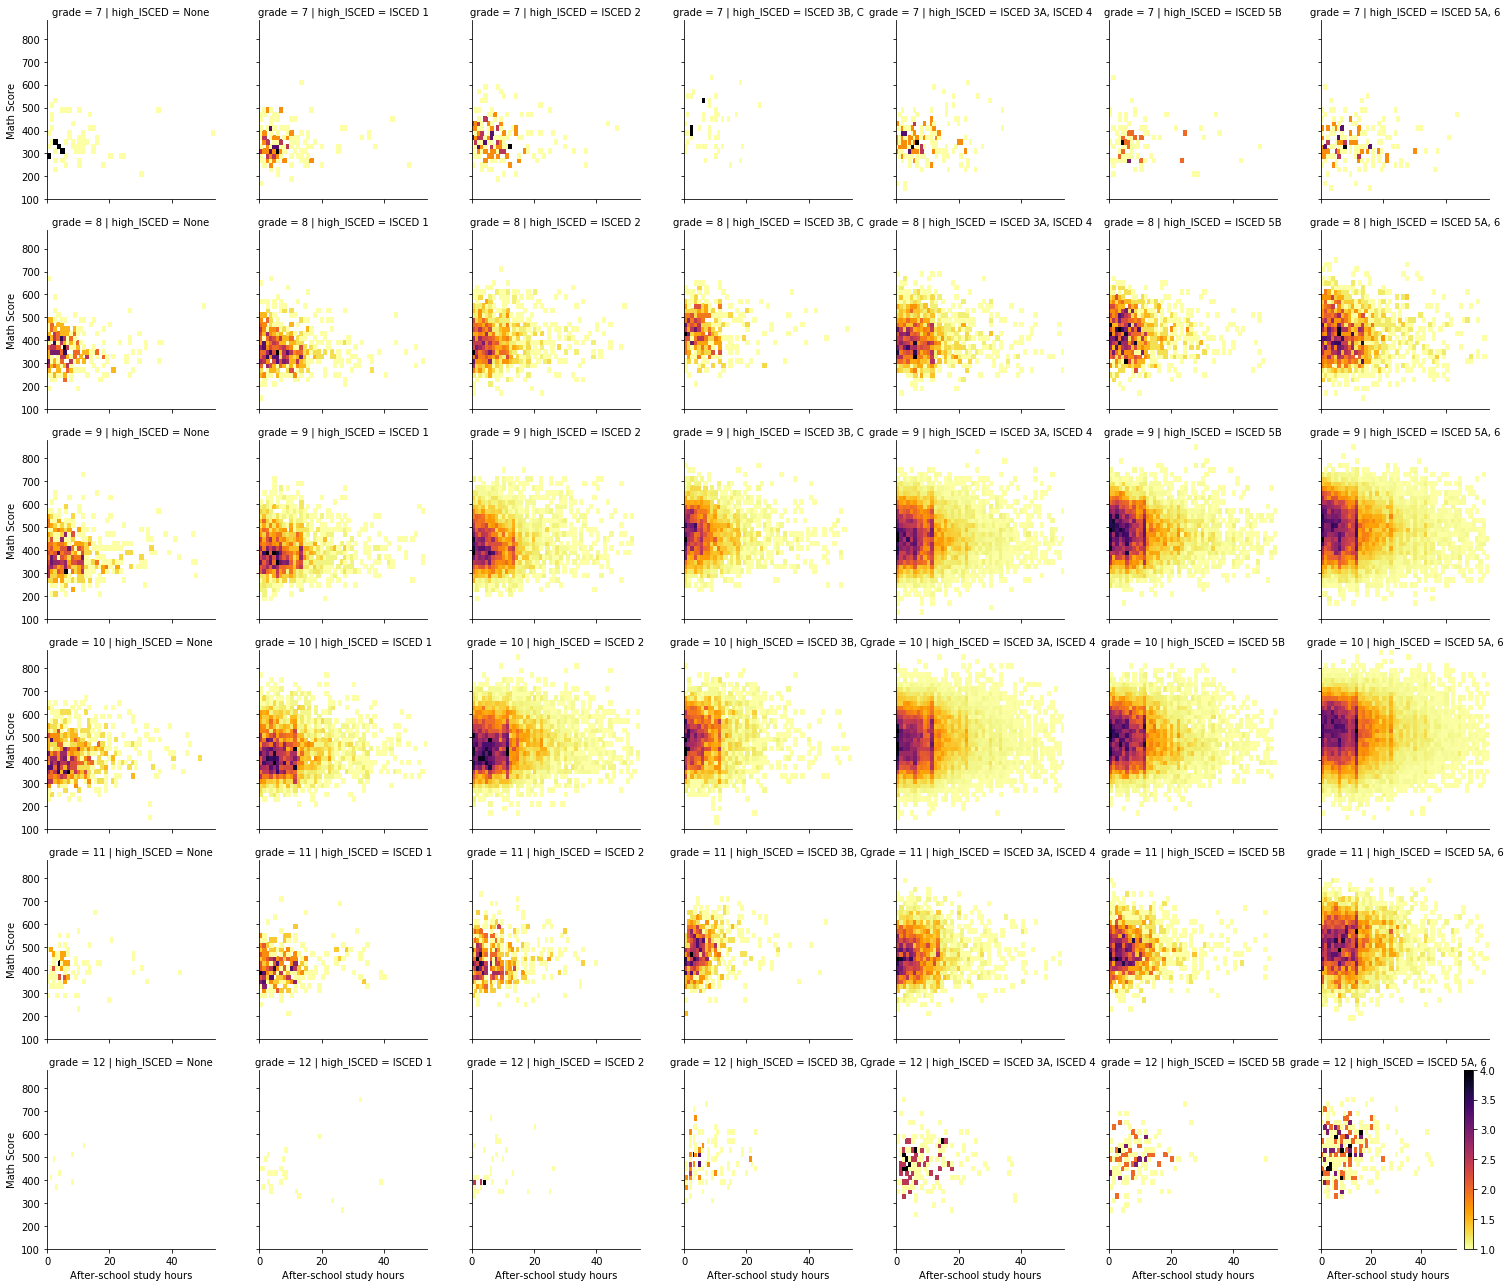

In [63]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade')
g.map(hist2dgrid, 'out_hrs', 'math', color = 'inferno_r')
g.set_xlabels('After-school study hours')
g.set_ylabels('Math Score')
plt.colorbar();

With the same approach we can conclude there is no obvious relation between math scores and after-school study hours.

Now take a look at `math` and `class_sz`.

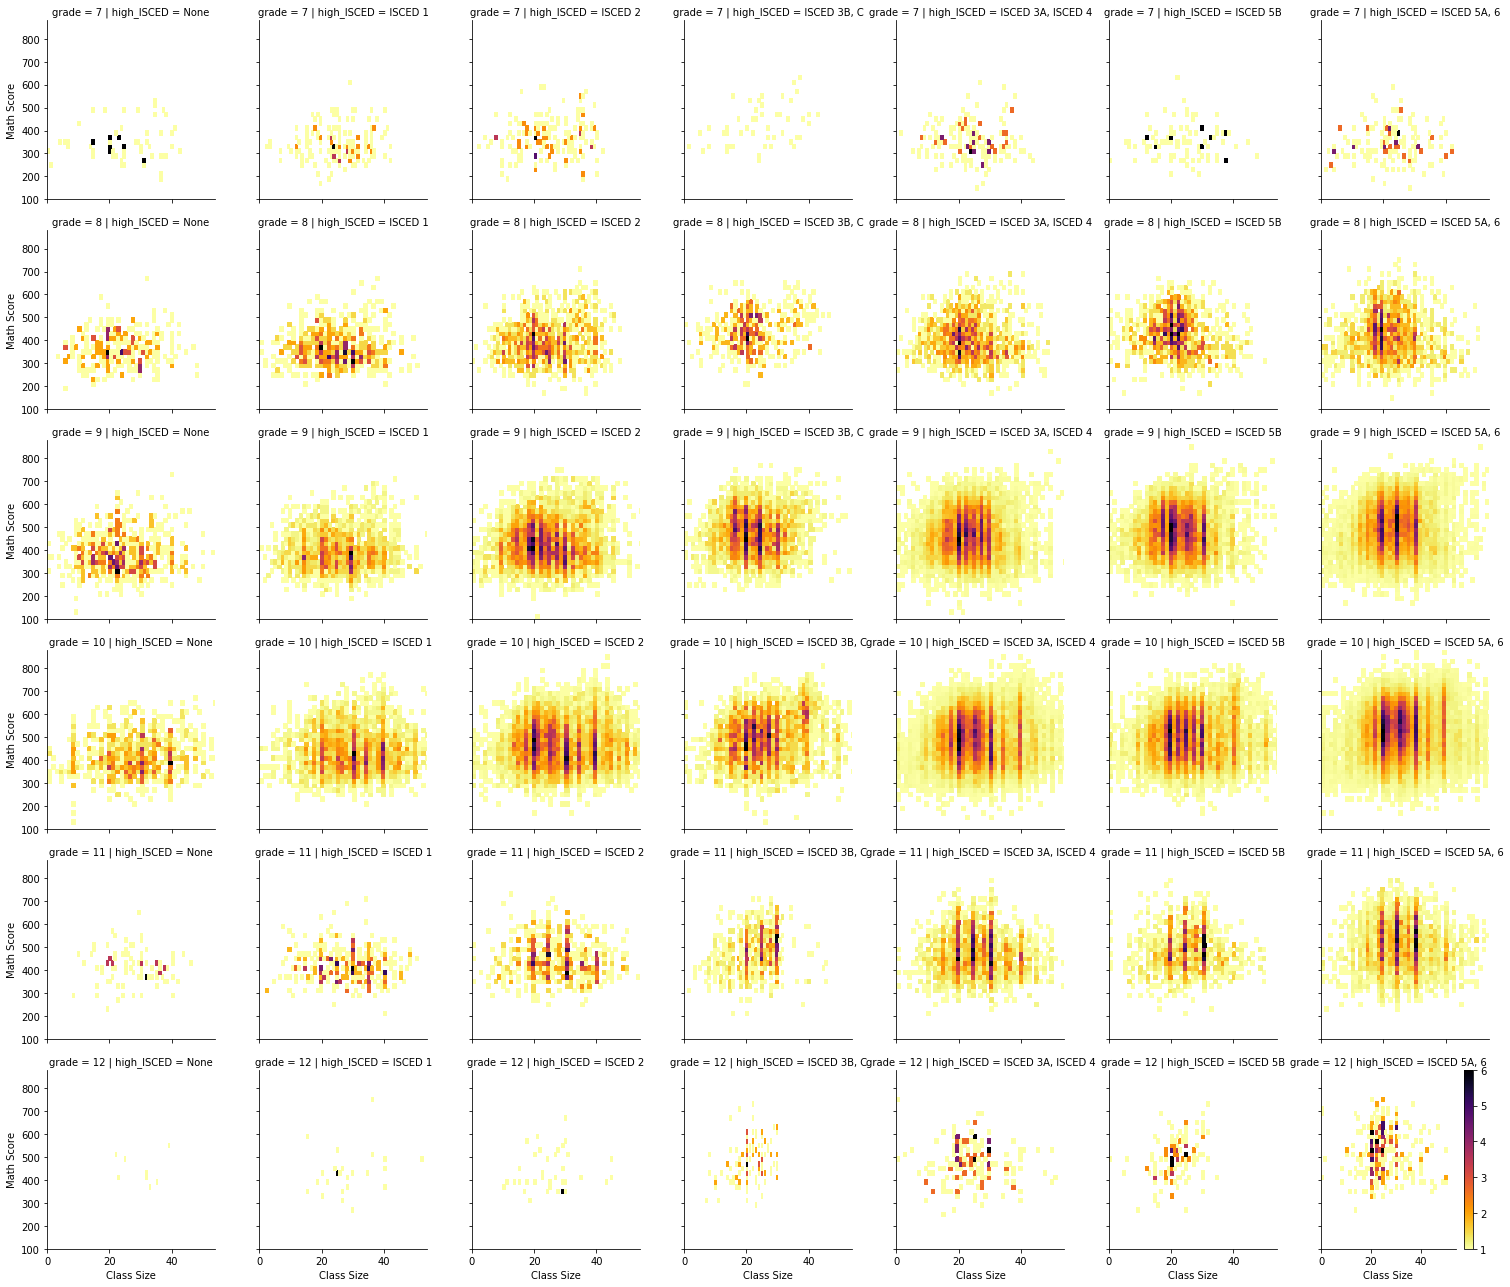

In [64]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade')
g.map(hist2dgrid, 'class_sz', 'math', color = 'inferno_r')
g.set_xlabels('Class Size')
g.set_ylabels('Math Score')
plt.colorbar();

Obviously there is no relationship between math score and class size.

Now take a look at `math` and `math_mins`.

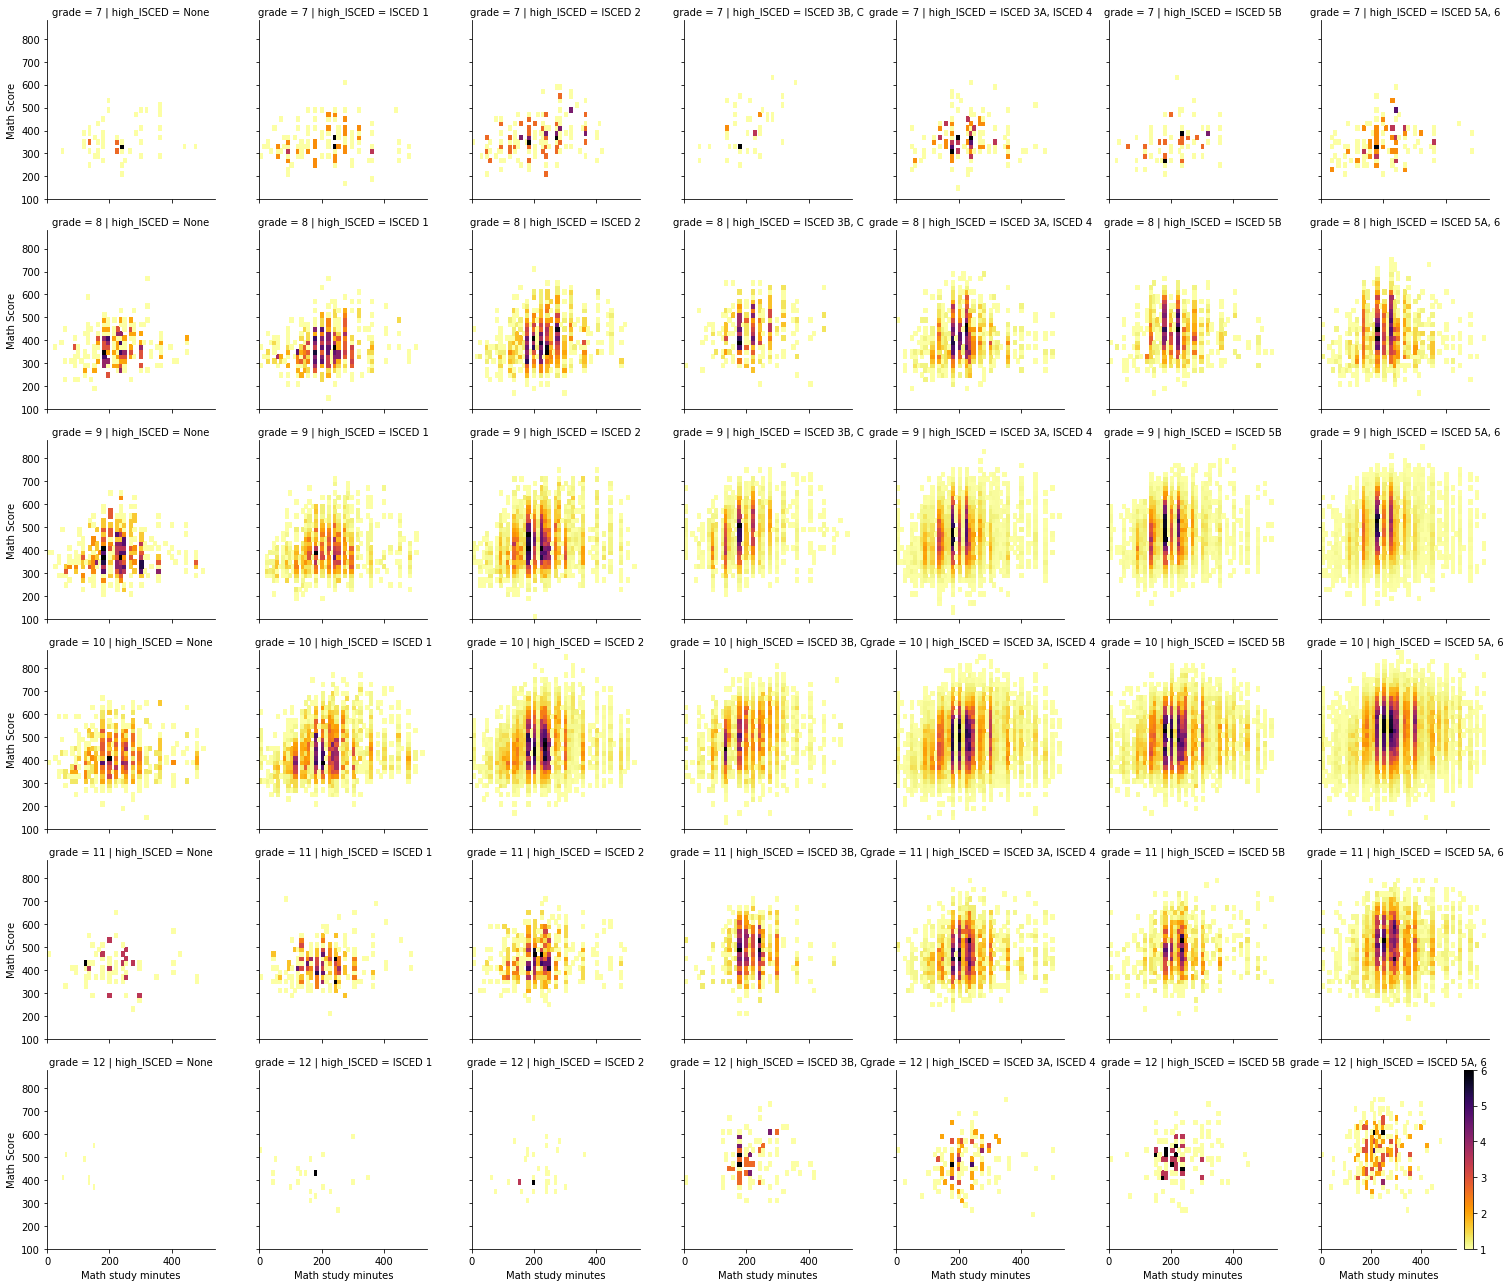

In [65]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_m, col = 'high_ISCED', row='grade')
g.map(hist2dgrid, 'math_mins', 'math', color = 'inferno_r')
g.set_xlabels('Math study minutes')
g.set_ylabels('Math Score')
plt.colorbar();

It appears there is a weak positive relations between `math` and `math_mins` for grade 9 and 10. It is more obvious when the parent education level is relatively low.  
Now I want to dig into some specific countries and see if the relationship is still weak. I am going to take a look into the top 10 countries with highest average math scores.

In [66]:
df_m_top8_index = pd.Series(df.groupby('country')['math'].mean().sort_values(ascending=False)[:8].index)
df_m_top8 = df_m[df_m['country'].isin(df_m_top8_index)]

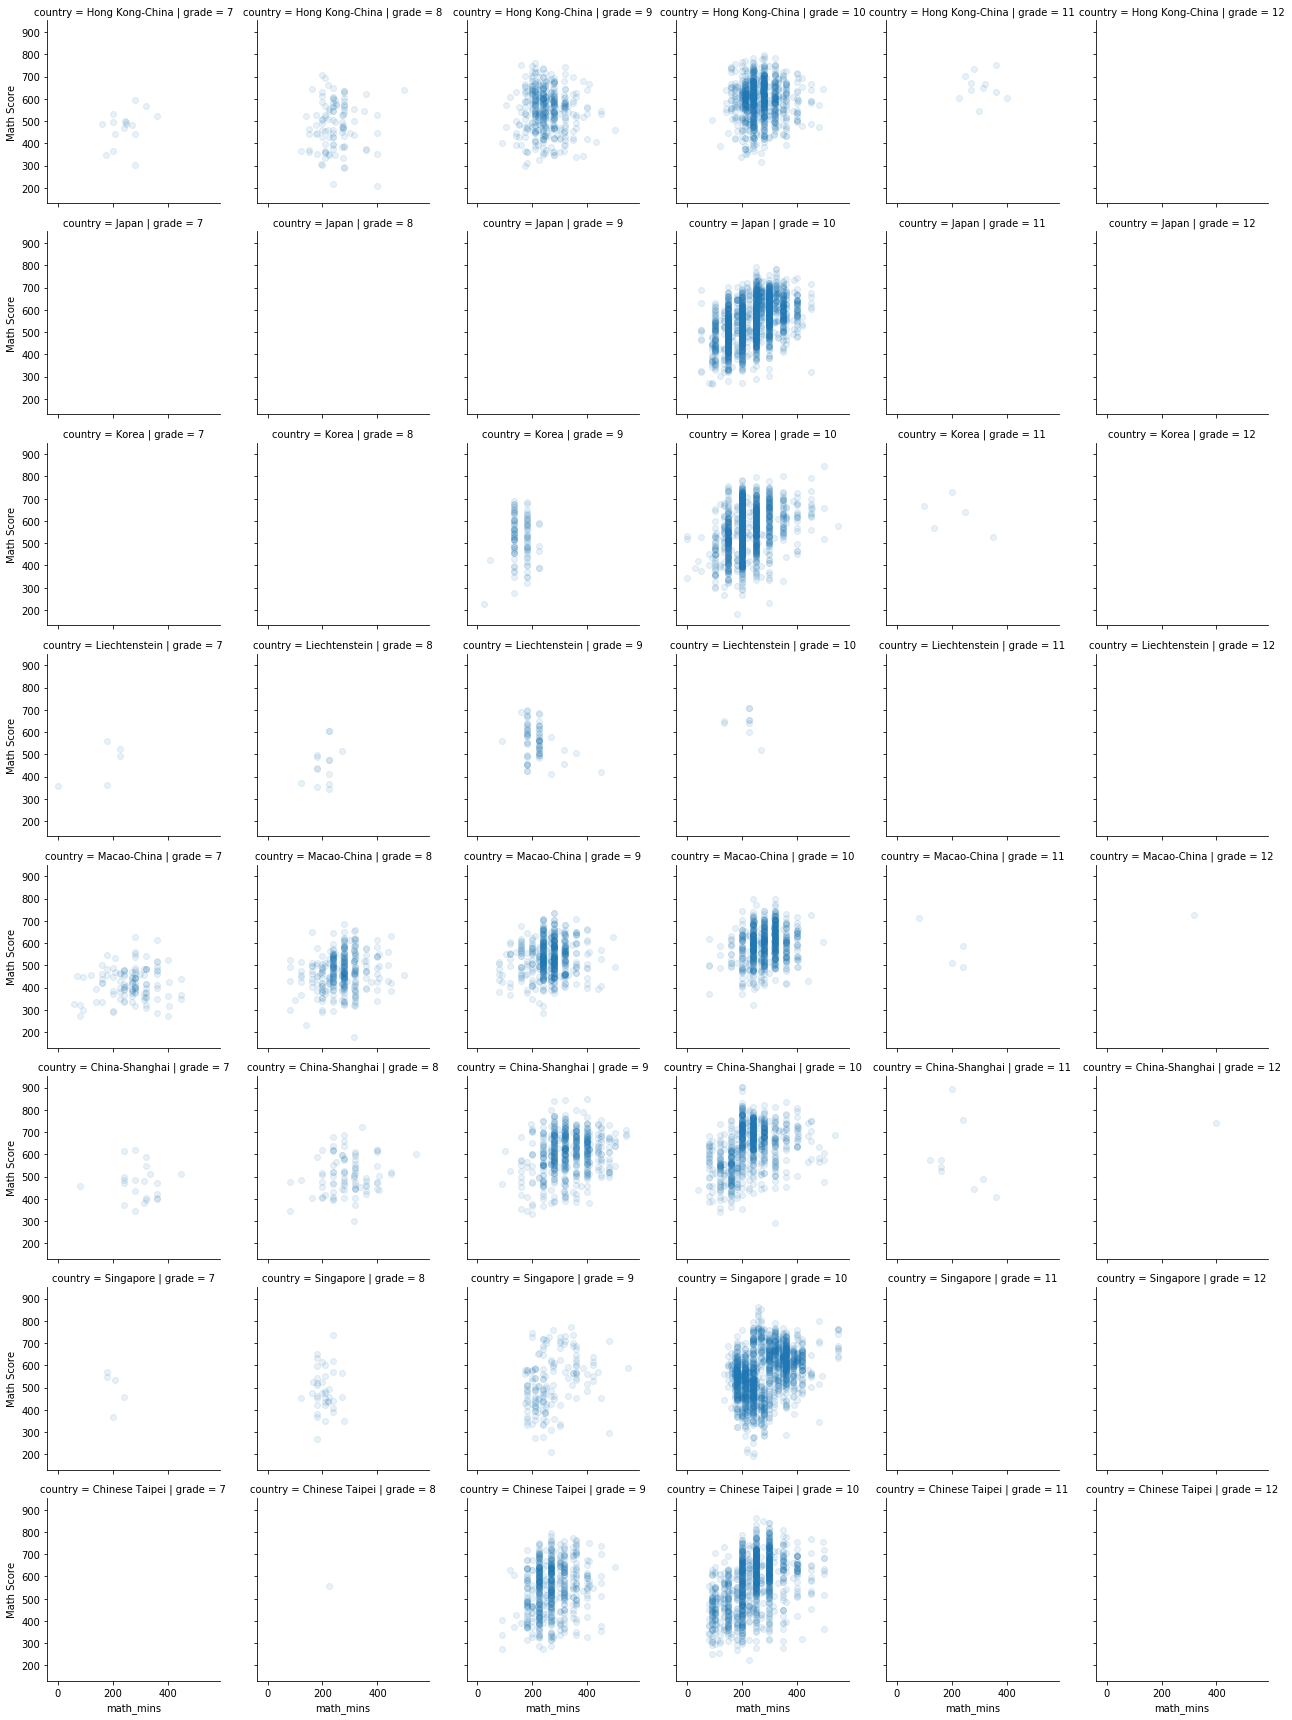

In [68]:
g = sb.FacetGrid(data = df_m_top8, col = 'grade', row='country')
g.map(plt.scatter, 'math_mins', 'math', alpha=0.1)
g.set_ylabels('Math Score');

Apparently majority of students in those 10 countries belong to grade 9 or 10, so I am going to take a closer look into each of those groups.

In [69]:
df_m_top8_grd9 = df_m_top8.query('grade == 9')
df_m_top8_grd10 = df_m_top8.query('grade == 10')

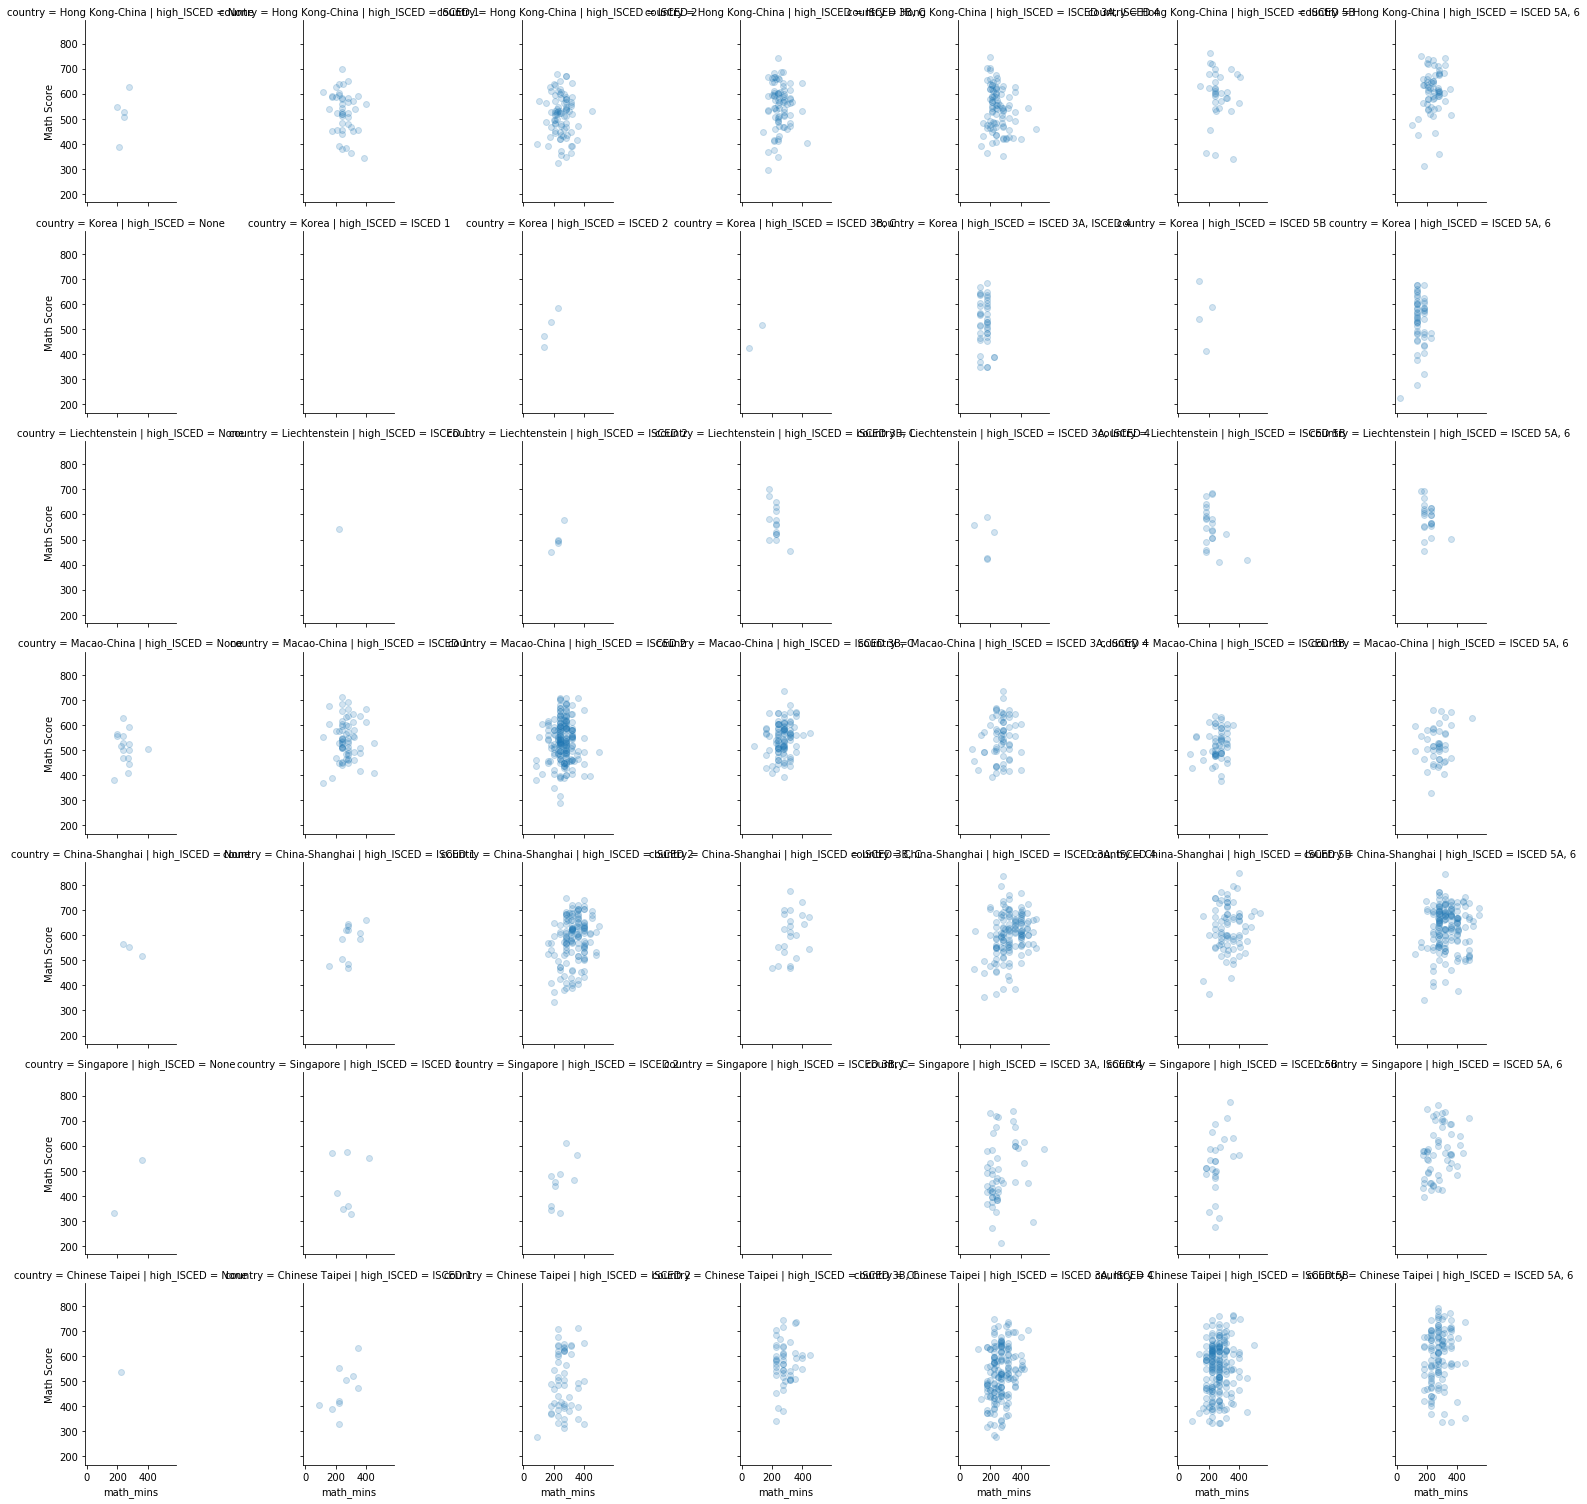

In [70]:
g = sb.FacetGrid(data = df_m_top8_grd9, col = 'high_ISCED', row='country')
g.map(plt.scatter, 'math_mins', 'math', alpha=0.2)
g.set_ylabels('Math Score');

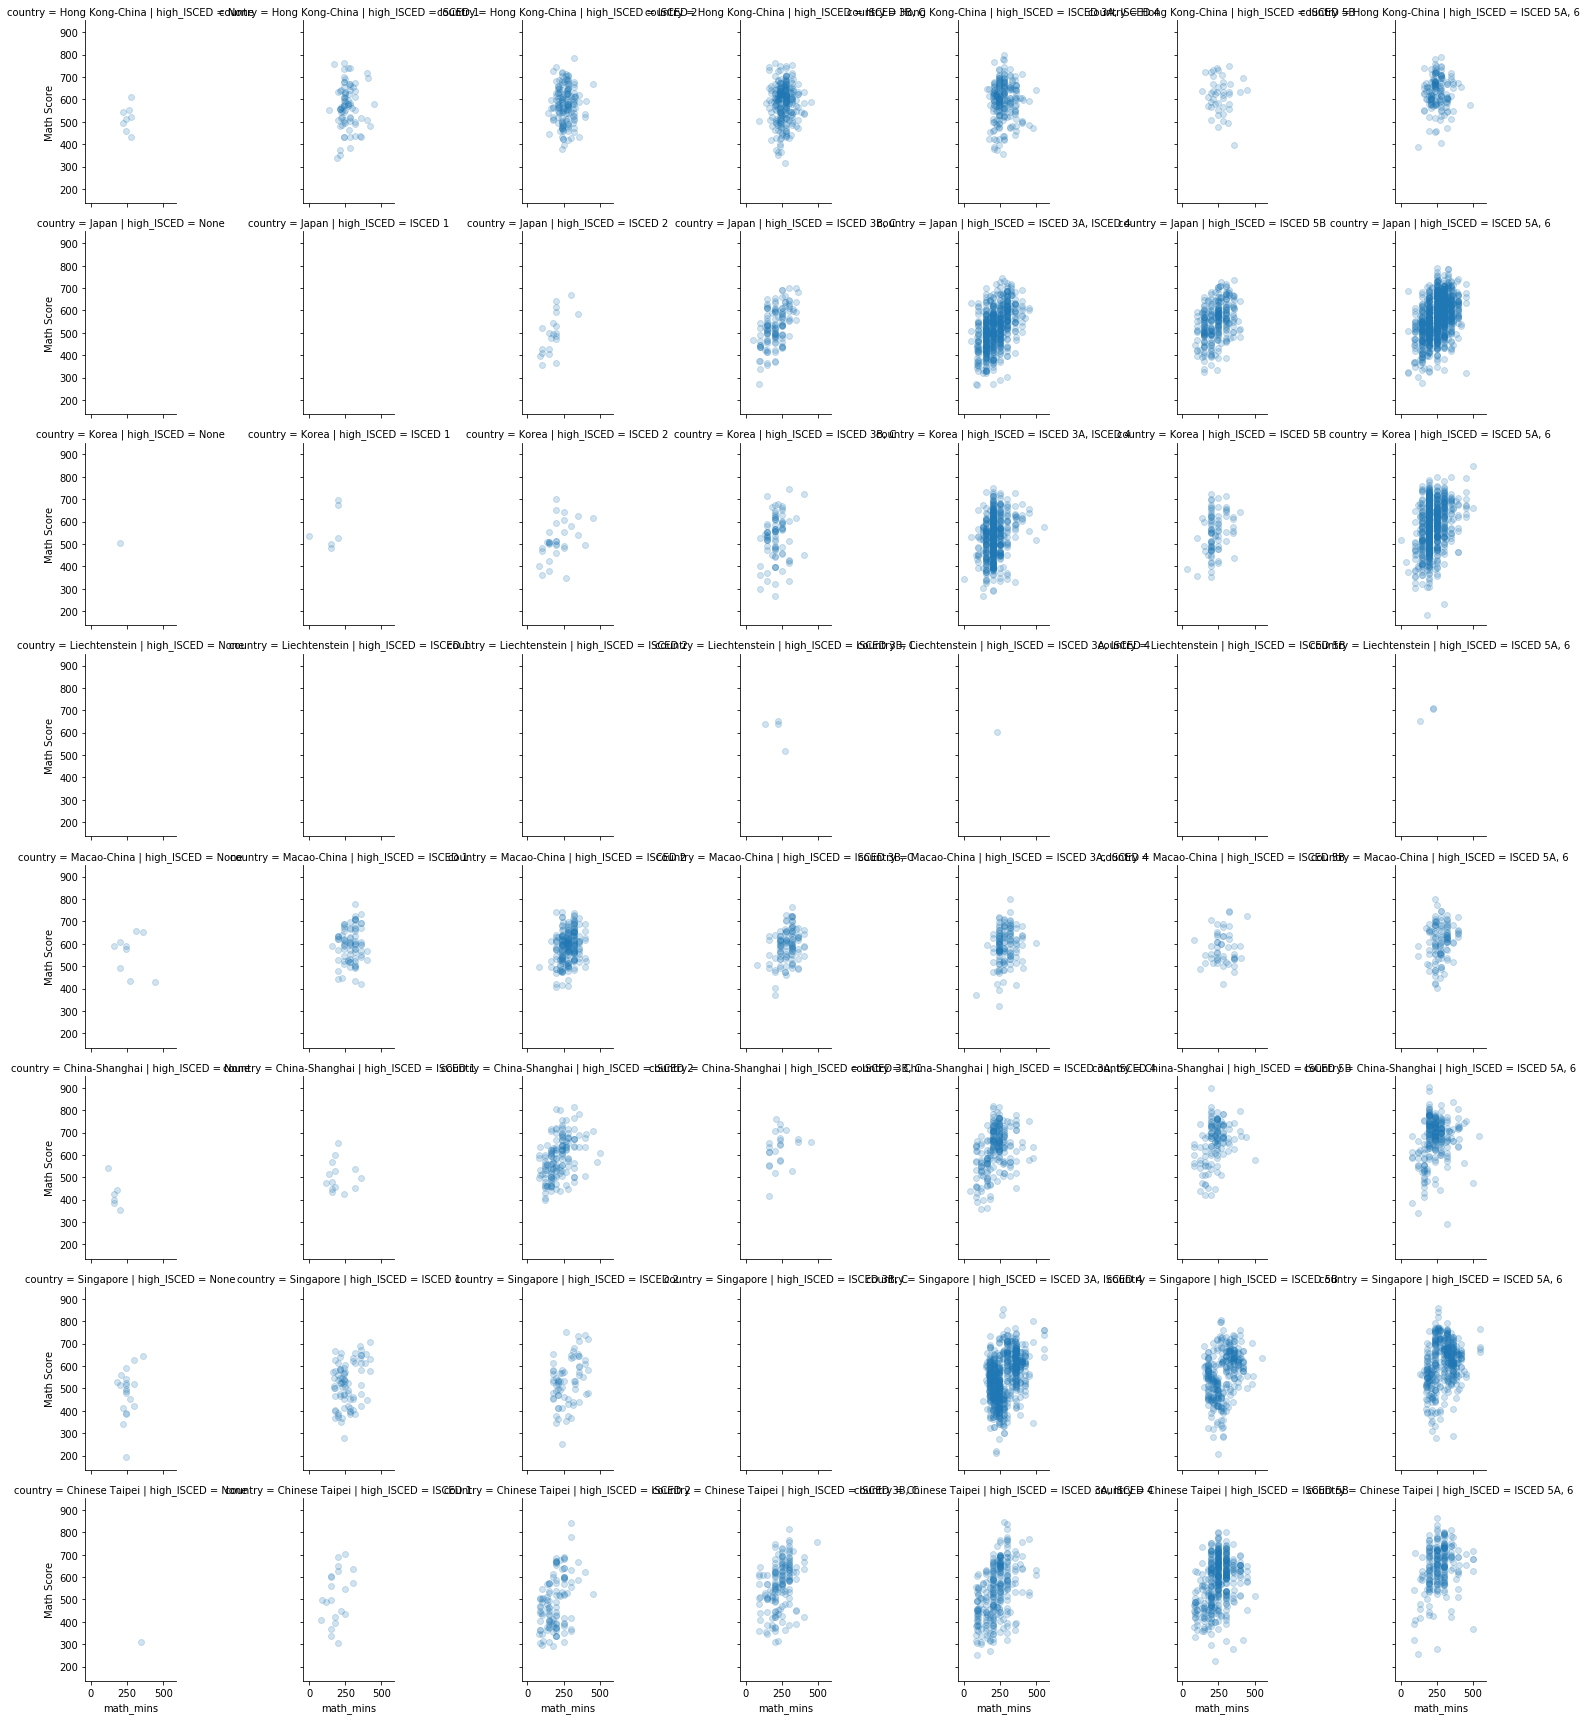

In [71]:
g = sb.FacetGrid(data = df_m_top8_grd10, col = 'high_ISCED', row='country')
g.map(plt.scatter, 'math_mins', 'math', alpha=0.2)
g.set_ylabels('Math Score');

It appears `math` has a strong positive relationship with `math_mins` in some of the Asian countries including: Japan, Korea, China-Shanghai, Singapore, Chinese Taipei.   
Now I will repeat the same procedure for `out_hrs`.

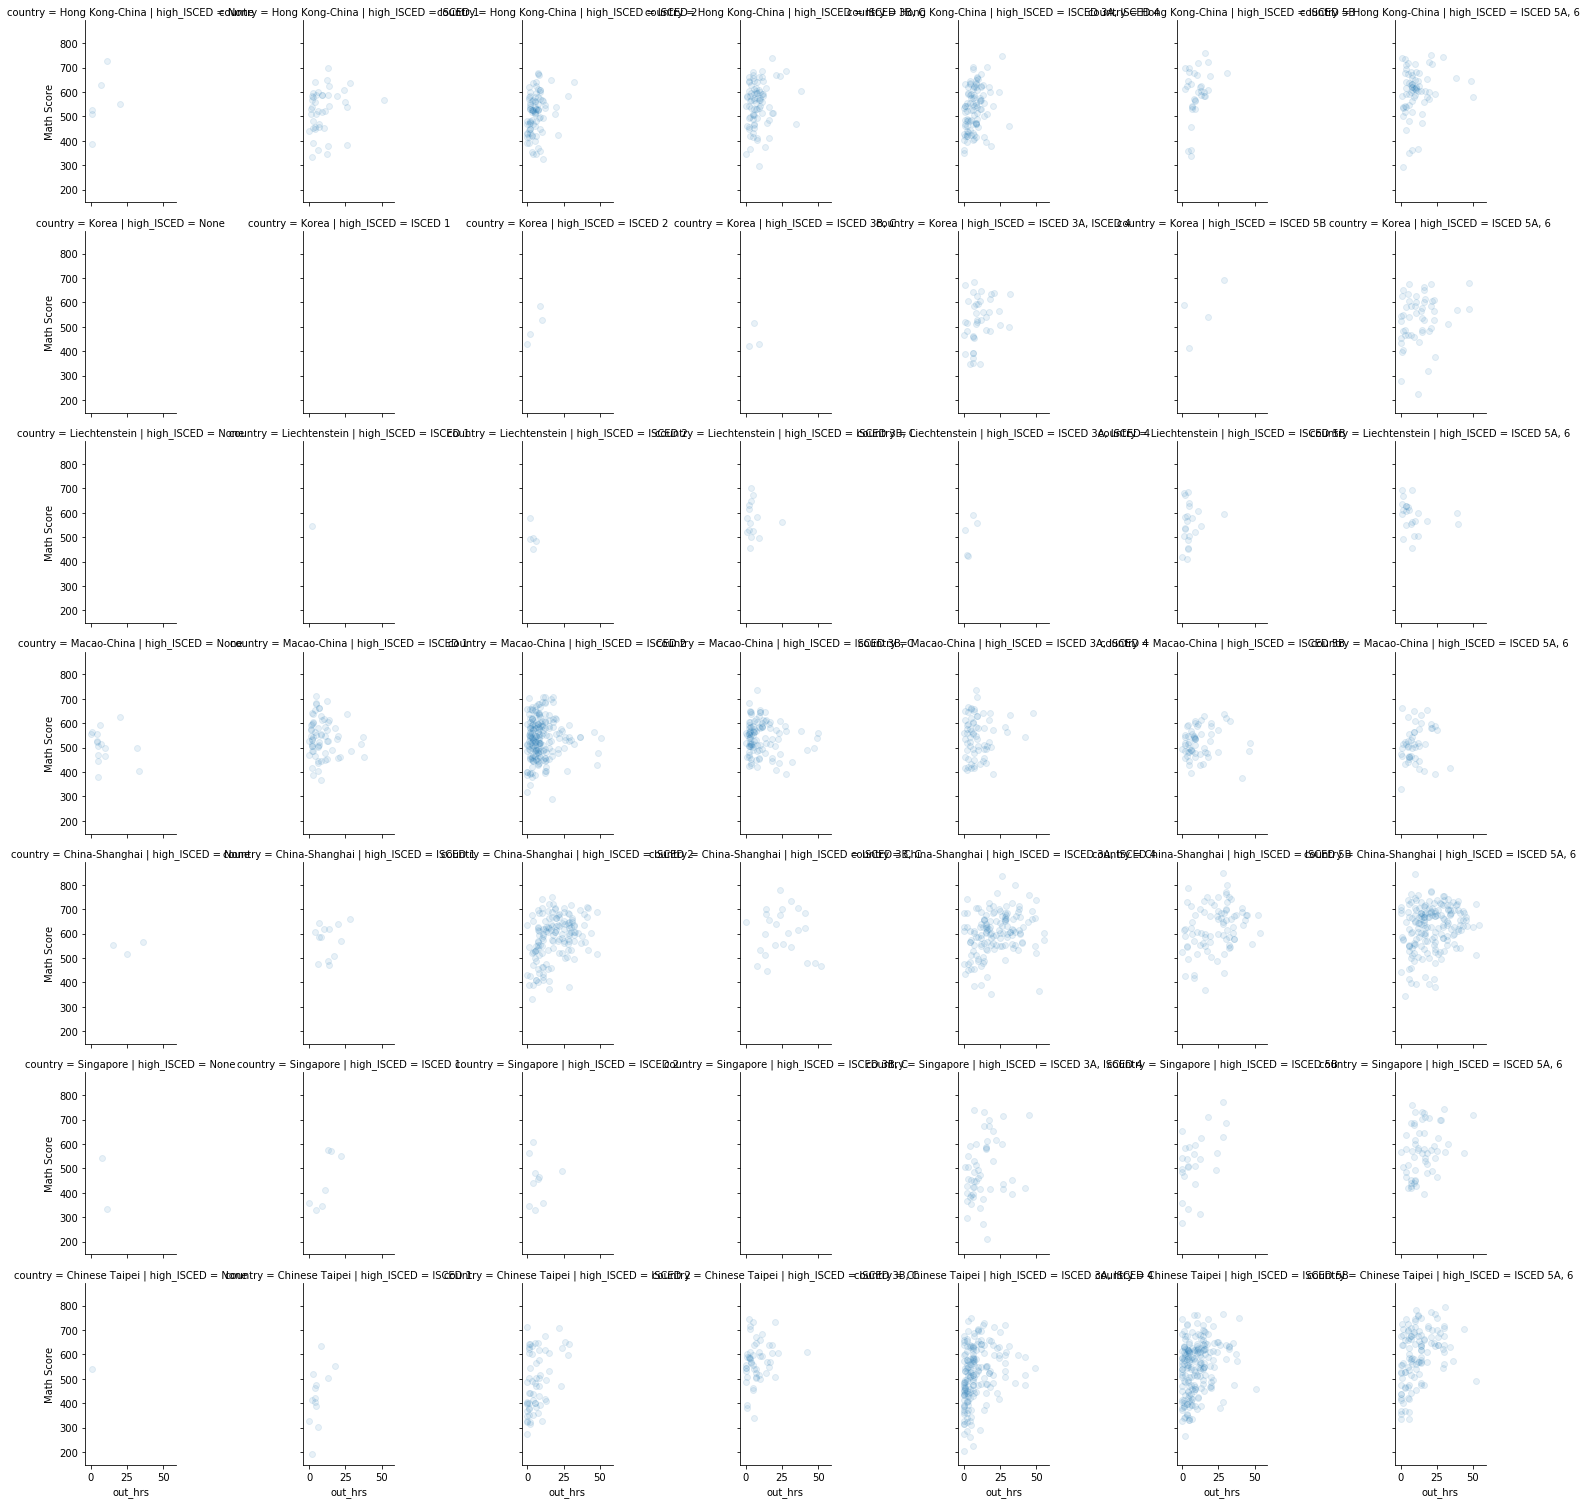

In [72]:
g = sb.FacetGrid(data = df_m_top8_grd9, col = 'high_ISCED', row='country')
g.map(plt.scatter, 'out_hrs', 'math', alpha=0.1)
g.set_ylabels('Math Score');

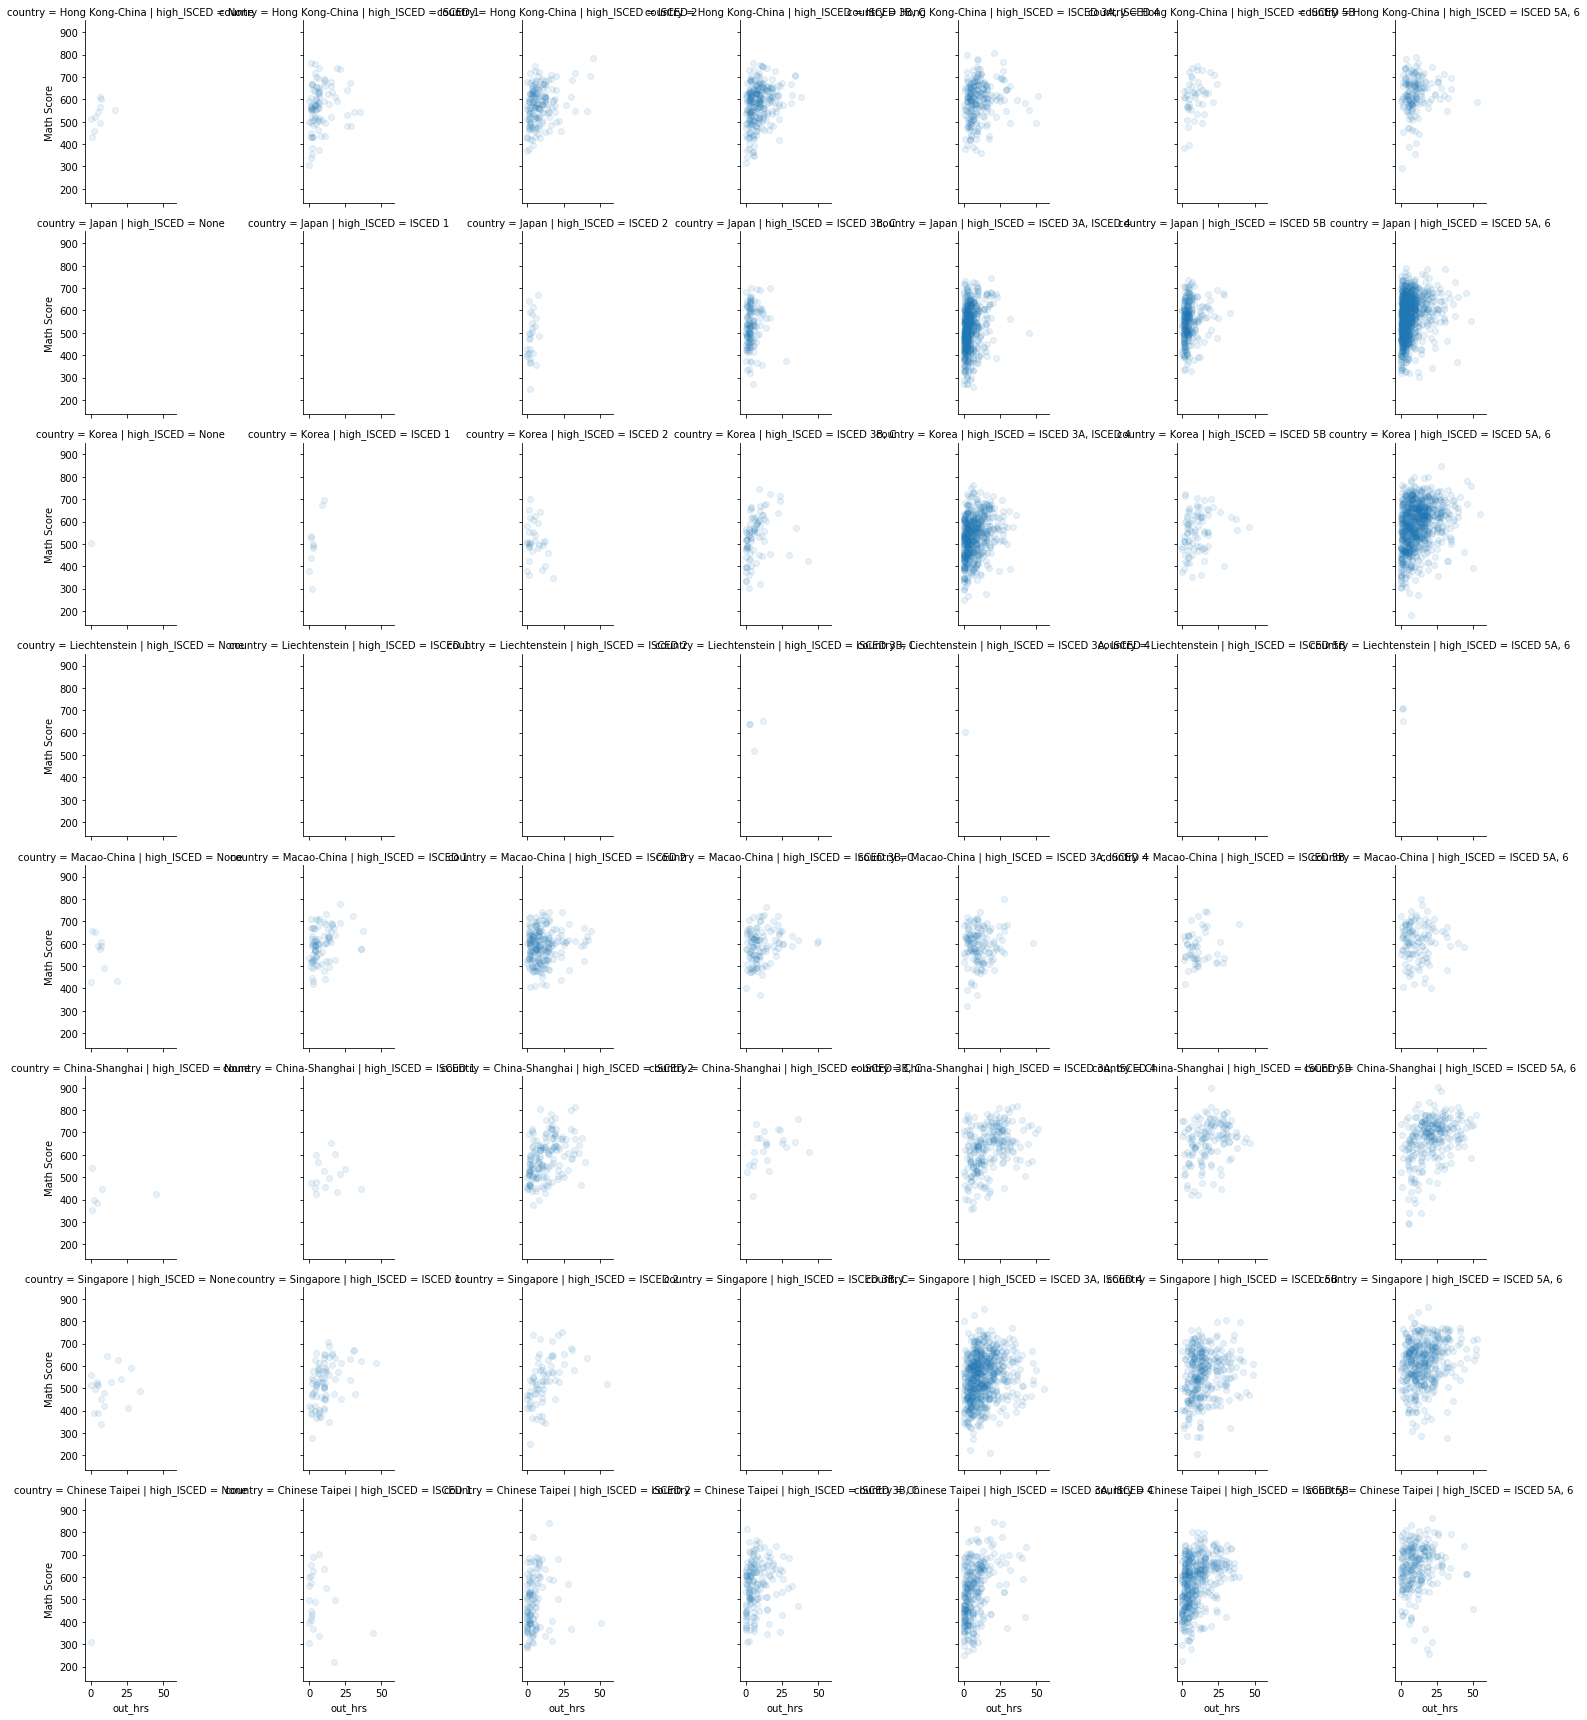

In [73]:
g = sb.FacetGrid(data = df_m_top8_grd10, col = 'high_ISCED', row='country')
g.map(plt.scatter, 'out_hrs', 'math', alpha=0.1)
g.set_ylabels('Math Score');

It appears `math` has positive relationship with `out_hrs` in some Asian countries including: Japan, Korea, China-Shanghai, Singapore, Chinese Taipei. 

Repeat the same procedure for `class_sz`

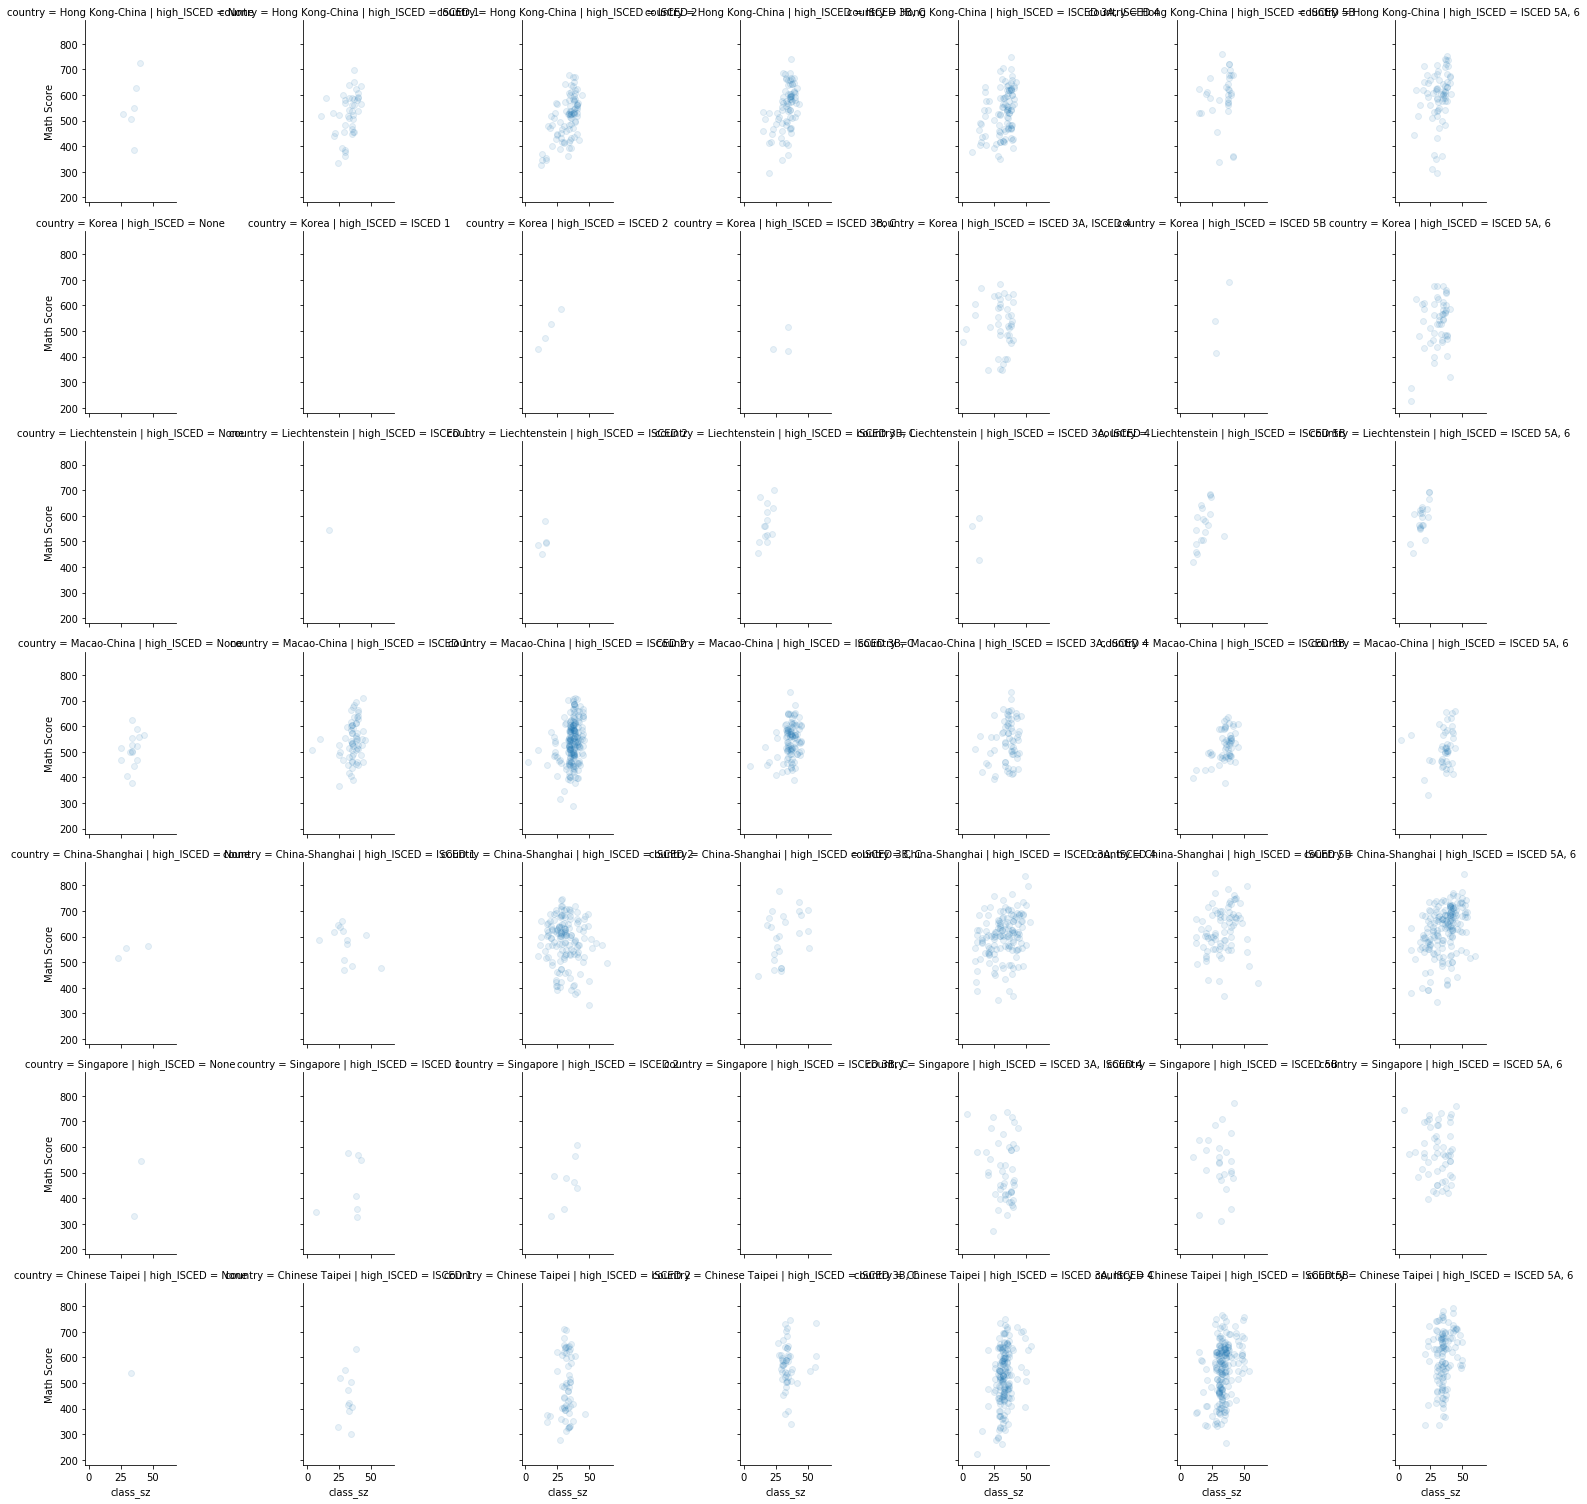

In [74]:
g = sb.FacetGrid(data = df_m_top8_grd9, col = 'high_ISCED', row='country')
g.map(plt.scatter, 'class_sz', 'math', alpha=0.1)
g.set_ylabels('Math Score');

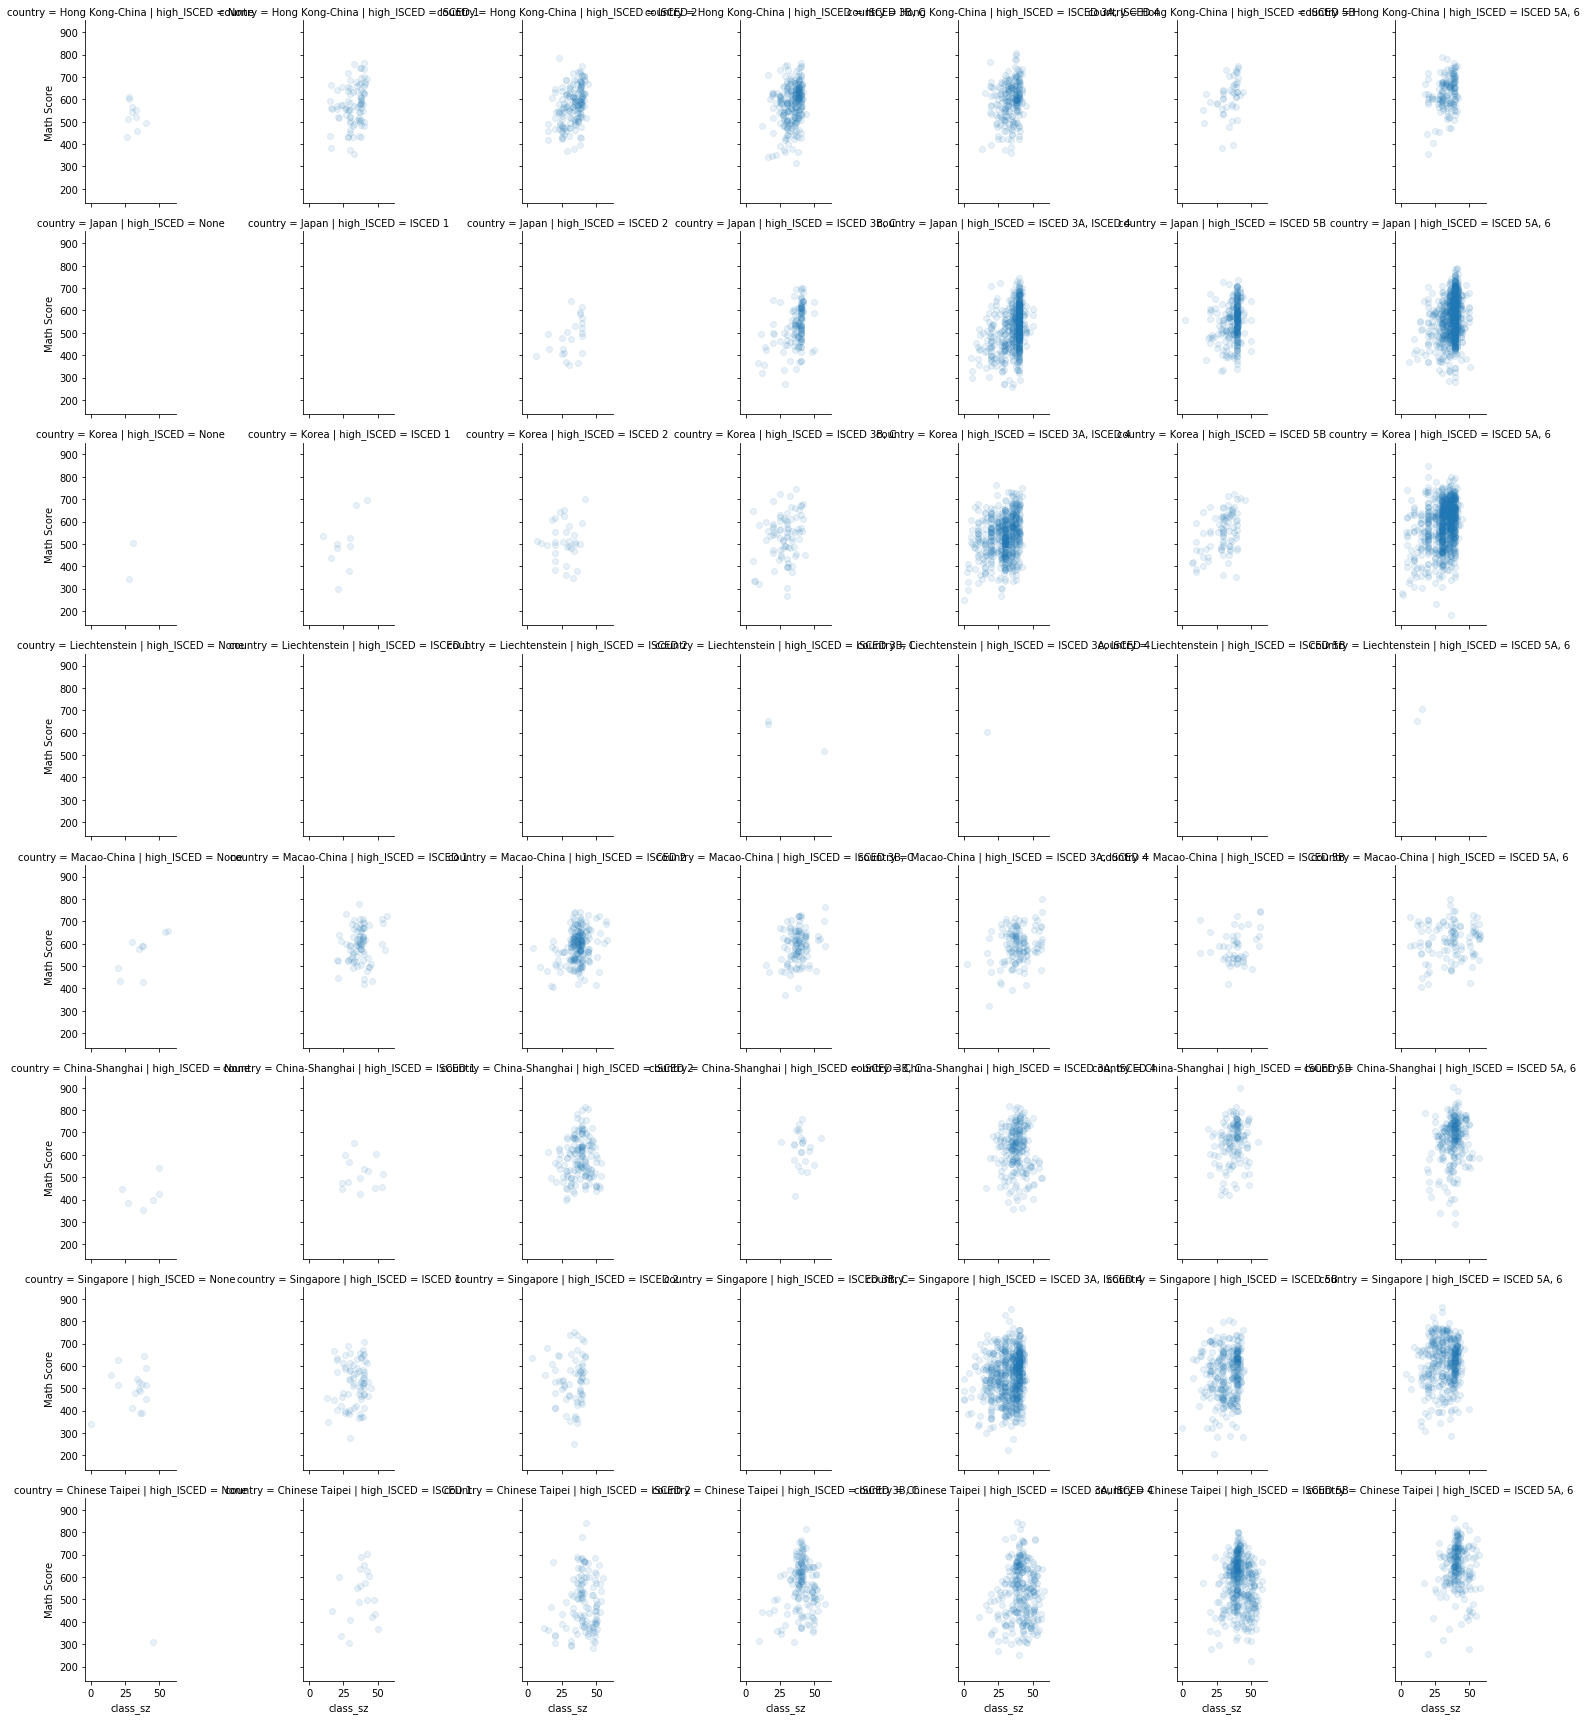

In [75]:
g = sb.FacetGrid(data = df_m_top8_grd10, col = 'high_ISCED', row='country')
g.map(plt.scatter, 'class_sz', 'math', alpha=0.1)
g.set_ylabels('Math Score');

There is no obvious relationship between `math` and `class_sz` even in individual countries.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I dug deep into each feature by isolating other features. The conclusions are mostly true.  
> Globally, the students' math performance is positively related to their grade, their parents' education level and family wealth. It has a weak positive relationship with the time they spend on math. It has no obvious relationship with the after-school study hours and class size. 
> However, when I look into some individual countries, the conclusion are slightly different. For some of the Asian countries whose students are top performers in math, there is a strong positive relationship between math score and their time spent on math. There is moderate positive relationship between math score and after-school study hours. The reason could be the academic competition in those countries are so fierce that every minutes they spend on the subject matters.
